In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0000,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0000,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0000,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0000,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0000,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,Apcnt_999968,3740.0,0.01730,0.0000,0.0000,0.000,770998.0,9637475.0,4047934.0,11641992.0,...,0.000000,9.09,0.730040,NaN,0.0,lending,591.048913,0.000000,0.241598,no
55996,Apcnt_999972,3360.0,2.01145,0.6252,0.0000,0.000,NaN,927765.0,NaN,NaN,...,0.297913,30.30,0.498208,NaN,0.0,lending,NaN,0.000000,NaN,yes
55997,Apcnt_999980,3500.0,0.76640,0.0000,0.0000,0.000,118645.0,3662435.0,3662435.0,3585024.0,...,0.550000,3.03,0.450512,0.0,0.0,lending,1252.474467,2.000000,0.163153,no
55998,Apcnt_999988,3280.0,0.05235,2.0916,2.2212,0.000,NaN,3458599.0,NaN,115533.0,...,0.942854,0.00,0.705048,1.0,0.0,charge,NaN,0.000000,0.002997,no


In [4]:
df.isnull().sum().nlargest(30)

form_field40    43729
form_field31    39408
form_field41    38229
form_field11    31421
form_field45    31317
form_field23    28123
form_field30    25509
form_field35    23148
form_field15    22475
form_field48    20889
form_field22    20400
form_field46    15904
form_field21    15854
form_field6     13360
form_field8     13360
form_field24    13297
form_field16    13036
form_field17    11151
form_field50    11056
form_field18    10402
form_field12     9895
form_field27     9299
form_field9      8008
form_field26     7438
form_field13     5889
form_field25     5450
form_field32     5450
form_field37     5450
form_field44     5383
form_field7      5163
dtype: int64

In [5]:
(df.isnull().sum().nlargest(30)).keys()

Index(['form_field40', 'form_field31', 'form_field41', 'form_field11',
       'form_field45', 'form_field23', 'form_field30', 'form_field35',
       'form_field15', 'form_field48', 'form_field22', 'form_field46',
       'form_field21', 'form_field6', 'form_field8', 'form_field24',
       'form_field16', 'form_field17', 'form_field50', 'form_field18',
       'form_field12', 'form_field27', 'form_field9', 'form_field26',
       'form_field13', 'form_field25', 'form_field32', 'form_field37',
       'form_field44', 'form_field7'],
      dtype='object')

In [6]:



#df.drop(['form_field40','form_field31','form_field41','form_field11','form_field45','form_field23','form_field30','form_field35','form_field15','form_field48','form_field22'], axis=1,inplace=True)

In [7]:
def impute_col(cols):
    
    mean0   = df.groupby('lending').mean()[cols][0]
    mean1 =df.groupby('lending').mean()[cols][1]
    
    def impute(col):
        lending = col[1]
        col =col[0]

        if pd.isnull(col):
            if lending ==0:
                return mean0
            elif lending ==1:
                return mean1
        else:
            return col
        
    df[cols] = df[[cols, 'lending']].apply(impute,axis=1)    
    

In [8]:
df.shape

(56000, 52)

In [9]:
df.drop('Applicant_ID',axis=1,inplace=True)

In [10]:
df.head(3)

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.80573,1.620483,0.322436,no
2,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,1079864.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes


In [11]:
df.isnull().sum()

form_field1        2529
form_field2        3844
form_field3         355
form_field4         355
form_field5         355
form_field6       13360
form_field7        5163
form_field8       13360
form_field9        8008
form_field10        355
form_field11      31421
form_field12       9895
form_field13       5889
form_field14          0
form_field15      22475
form_field16      13036
form_field17      11151
form_field18      10402
form_field19          4
form_field20        355
form_field21      15854
form_field22      20400
form_field23      28123
form_field24      13297
form_field25       5450
form_field26       7438
form_field27       9299
form_field28        355
form_field29        355
form_field30      25509
form_field31      39408
form_field32       5450
form_field33       1256
form_field34        355
form_field35      23148
form_field36       1995
form_field37       5450
form_field38        355
form_field39       4211
form_field40      43729
form_field41      38229
form_field42    

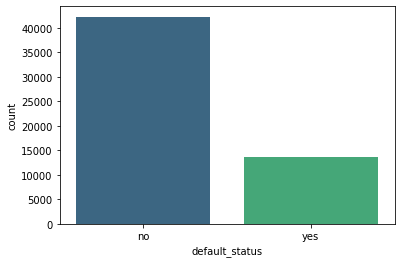

In [12]:
sns.countplot(x='default_status',data =df, palette='viridis')

In [13]:
target = pd.get_dummies(df['default_status'],drop_first=True)

In [14]:
productType = pd.get_dummies(df['form_field47'],drop_first=True)

In [15]:
productType

,lending
0,0
1,0
2,0
3,0
4,0
...,...
55995,1
55996,1
55997,1
55998,0


In [16]:
df = pd.concat([df,target,productType],axis=1)

In [17]:
df.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status,yes,lending
0,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,...,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no,0,0
1,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,...,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no,0,0
2,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,1079864.0,...,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes,1,0
3,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,...,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no,0,0
4,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,...,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no,0,0


In [18]:
df.drop(['default_status','form_field47'],axis=1,inplace=True)

In [19]:
#df = df.fillna(0)

In [20]:
for i in df.drop(['lending','yes'],axis =1).columns:
    impute_col(i)

In [22]:
df.isnull().sum()

form_field1     0
form_field2     0
form_field3     0
form_field4     0
form_field5     0
form_field6     0
form_field7     0
form_field8     0
form_field9     0
form_field10    0
form_field11    0
form_field12    0
form_field13    0
form_field14    0
form_field15    0
form_field16    0
form_field17    0
form_field18    0
form_field19    0
form_field20    0
form_field21    0
form_field22    0
form_field23    0
form_field24    0
form_field25    0
form_field26    0
form_field27    0
form_field28    0
form_field29    0
form_field30    0
form_field31    0
form_field32    0
form_field33    0
form_field34    0
form_field35    0
form_field36    0
form_field37    0
form_field38    0
form_field39    0
form_field40    0
form_field41    0
form_field42    0
form_field43    0
form_field44    0
form_field45    0
form_field46    0
form_field48    0
form_field49    0
form_field50    0
yes             0
lending         0
dtype: int64

In [23]:
X = df.drop(['yes'],axis=1)
y= df['yes']

In [24]:
#df.to_csv('train_mean_novardropped.csv',index=False)

In [25]:
X.shape

(56000, 50)

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [25]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.fit_transform(x_test)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [26]:
X_min = sc.fit_transform(X)

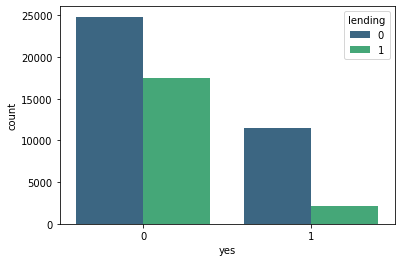

In [27]:
sns.countplot(x='yes',data =df, hue='lending', palette='viridis')

In [28]:
#logmodel.fit(X_min,y)
logmodel.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [31]:
predictions = logmodel.predict_proba(x_test)[:,1]

In [32]:
logmodel.score(x_test,y_test)

0.7589285714285714

In [33]:
from sklearn.metrics import roc_auc_score

score = roc_auc_score(y_test, predictions)
print("AUC Score on validation set: ",score)

AUC Score on validation set:  0.7276013396023131


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [36]:
def test_score(y_test, pred):
    TN,FP,FN,TP = confusion_matrix(y_test, pred).ravel()

    test_score = (TP +TN)/(TP+TN + FN+FP)
    return test_score

In [178]:
test_score(y_test,predictions)

0.7984523809523809

In [37]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix

#F1 scores
f1 = f1_score(y_true=y_test, y_pred=predictions, pos_label=0)
f1

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [28]:
test = pd.read_csv('Test.csv')

In [29]:
test.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,...,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,...,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [30]:
#x_test.head()

In [31]:
#test.drop(['form_field40','form_field31','form_field41','form_field11','form_field45','form_field23','form_field30','form_field35','form_field15','form_field48','form_field22'], axis=1,inplace=True)

In [32]:
test.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,...,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,...,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [33]:
#test["form_field47"] = LabelEncoder().fit_transform(test["form_field47"])
testproductType = pd.get_dummies(test['form_field47'],drop_first=True)

In [34]:
test = pd.concat([test,testproductType],axis=1)

In [35]:
test.drop('form_field47',axis=1,inplace=True)

In [36]:
test.shape

(24000, 51)

In [37]:
test.isnull().sum().nlargest(40)

form_field40    18828
form_field31    16810
form_field41    16349
form_field45    13538
form_field11    13398
form_field23    12125
form_field30    10908
form_field35     9866
form_field15     9592
form_field48     8922
form_field22     8724
form_field46     6885
form_field21     6707
form_field24     5605
form_field6      5604
form_field8      5604
form_field16     5474
form_field50     4797
form_field17     4695
form_field18     4369
form_field12     4183
form_field27     3910
form_field9      3400
form_field26     3172
form_field13     2463
form_field44     2362
form_field25     2256
form_field32     2256
form_field37     2256
form_field7      2231
form_field39     1829
form_field2      1709
form_field1      1110
form_field36      903
form_field42      578
form_field33      495
form_field43      250
form_field10      147
form_field20      147
form_field28      147
dtype: int64

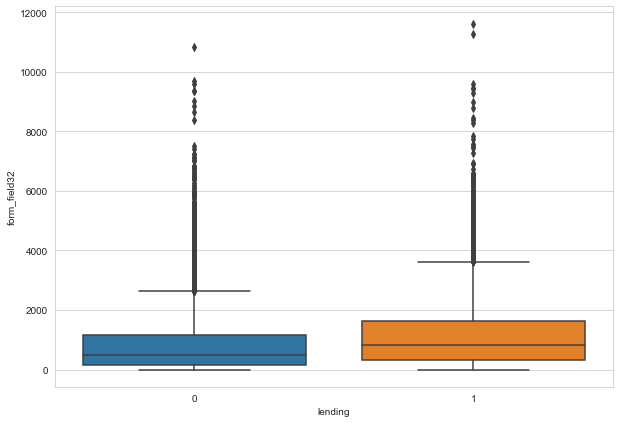

In [38]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.boxplot(x='lending',y='form_field32',data= test)

In [39]:
df[df['form_field21'] <125]

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,yes,lending
1,3456.0,0.67400,0.2342,0.0,0.0,0.0,898979.0,497531.0,9073814.0,2533168.0,...,0.314281,8.08,0.183584,NaN,0.0,349.805730,1.620483,0.322436,0,0
3,3372.0,0.17005,0.5050,0.0,0.0,192166.0,3044703.0,385499.0,3986472.0,3621979.0,...,0.488884,2.02,0.685168,NaN,0.0,89.940100,0.664452,0.082729,0,0
4,3370.0,0.77270,1.1010,0.0,0.0,1556.0,214728.0,214728.0,1284089.0,361770.0,...,0.275000,12.12,0.438168,0.0,0.0,97.887502,1.427891,0.045630,0,0
5,3724.0,NaN,0.0000,0.0,0.0,192944.0,9244585.0,6761209.0,67963357.0,32902009.0,...,0.030558,12.12,0.382960,NaN,0.0,NaN,0.000000,NaN,0,1
7,3416.0,0.87020,0.0570,0.0,0.0,17505.0,186331.0,186331.0,1484813.0,326760.0,...,0.137500,3.03,0.635960,NaN,0.0,155.295994,0.946074,0.128389,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55990,3600.0,0.50335,0.0000,0.0,0.0,755049.0,12006096.0,1927495.0,40139743.0,44192734.0,...,0.000000,17.17,0.384520,0.0,0.0,1133.436392,2.000000,0.416495,0,0
55993,3556.0,0.69340,0.0736,0.0,0.0,96472.0,3469491.0,3469491.0,28291192.0,21997172.0,...,0.000000,28.28,0.302904,0.0,0.0,388.855406,0.931446,1.287517,0,1
55995,3740.0,0.01730,0.0000,0.0,0.0,770998.0,9637475.0,4047934.0,11641992.0,19910965.0,...,0.000000,9.09,0.730040,NaN,0.0,591.048913,0.000000,0.241598,0,1
55997,3500.0,0.76640,0.0000,0.0,0.0,118645.0,3662435.0,3662435.0,3585024.0,704090.0,...,0.550000,3.03,0.450512,0.0,0.0,1252.474467,2.000000,0.163153,0,1


In [40]:
df.corr()['yes'].nlargest()

yes             1.000000
form_field42    0.329039
form_field21    0.325634
form_field22    0.322421
form_field23    0.318622
Name: yes, dtype: float64

In [41]:
df.corr()['yes'].nsmallest()

form_field1    -0.414826
lending        -0.227926
form_field8    -0.227655
form_field28   -0.220421
form_field27   -0.218191
Name: yes, dtype: float64

In [42]:
df['form_field1'].min()

2990.0

In [43]:
#test.drop('Applicant_ID', axis=1,inplace=True)
test.head(2)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,lending
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,NaN,0.000000,0.011221,0
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,NaN,0.504974,0.043525,1


In [44]:
#x_test.head(2)

In [45]:
def impute_col(cols):
    
    mean0   = test.groupby('lending').mean()[cols][0]
    mean1 =test.groupby('lending').mean()[cols][1]
    
    def impute(col):
        lending = col[1]
        col =col[0]

        if pd.isnull(col):
            if lending ==0:
                return mean0
            elif lending ==1:
                return mean1
        else:
            return col
        
    test[cols] = test[[cols, 'lending']].apply(impute,axis=1)    
    

In [46]:
test.isnull().sum().nlargest(10)

form_field40    18828
form_field31    16810
form_field41    16349
form_field45    13538
form_field11    13398
form_field23    12125
form_field30    10908
form_field35     9866
form_field15     9592
form_field48     8922
dtype: int64

In [47]:
test['form_field46'].value_counts()

0.0     15651
1.0      1295
2.0       152
3.0        13
5.0         2
19.0        1
9.0         1
Name: form_field46, dtype: int64

In [48]:
#test = test.fillna(0)

In [49]:
#impute_col('form_field46')

In [50]:
test.drop('Applicant_ID', axis=1,inplace=True)

In [62]:
for i in test.drop('lending',axis =1).columns:
    impute_col(i)

In [51]:
test.isnull().sum()

form_field1      1110
form_field2      1709
form_field3       146
form_field4       146
form_field5       146
form_field6      5604
form_field7      2231
form_field8      5604
form_field9      3400
form_field10      147
form_field11    13398
form_field12     4183
form_field13     2463
form_field14        0
form_field15     9592
form_field16     5474
form_field17     4695
form_field18     4369
form_field19        0
form_field20      147
form_field21     6707
form_field22     8724
form_field23    12125
form_field24     5605
form_field25     2256
form_field26     3172
form_field27     3910
form_field28      147
form_field29      147
form_field30    10908
form_field31    16810
form_field32     2256
form_field33      495
form_field34      147
form_field35     9866
form_field36      903
form_field37     2256
form_field38      147
form_field39     1829
form_field40    18828
form_field41    16349
form_field42      578
form_field43      250
form_field44     2362
form_field45    13538
form_field

In [52]:
test.head(2)

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,lending
0,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,0.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,NaN,0.000000,0.011221,0
1,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,18308285.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,NaN,0.504974,0.043525,1


In [53]:
test.shape

(24000, 50)

In [54]:
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
sc = MinMaxScaler()
test = sc.fit_transform(test)

In [131]:
log_pred = logmodel.predict_proba(test)[:,1]

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [62]:
df2 = pd.read_csv('Test.csv')
df2.head(2)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525


In [70]:
submission = pd.DataFrame()
submission['Applicant_ID'] = df2['Applicant_ID']
submission['default_status'] = log_pred

In [ ]:
submission

In [131]:
submission.to_csv('loandefault40_submissionlogfull.csv',index=False)

In [71]:
def models(X_train, Y_train):
    
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    
    from sklearn.neighbors import KNeighborsClassifier  
    knn = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski',p=2)
    knn.fit(X_train,Y_train)
    
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear',random_state =0)
    svc_lin.fit(X_train,Y_train)
    
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf',random_state =0)
    svc_rbf.fit(X_train,Y_train)
    
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train,Y_train)
    
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion= 'entropy',random_state =0)
    tree.fit(X_train,Y_train)
    
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators =100, criterion ='entropy', max_depth=2, random_state =0)
    forest.fit(X_train,Y_train)
    
    print('[0]Logistic Regression Training Accuracy: ', log.score(X_train, Y_train))
    print('[1]K Neighbors Training Accuracy: ', knn.score(X_train, Y_train))
    print('[2]SVC Linear Training Accuracy: ', svc_lin.score(X_train, Y_train))
    print('[3[]SVC RBF Training Accuracy: ', svc_rbf.score(X_train, Y_train))
    print('[4]Gaussian NB Training Accuracy: ', gauss.score(X_train, Y_train))
    print('[5]Decision Tree Training Accuracy: ', tree.score(X_train, Y_train))
    print('[6]Random Forest Training Accuracy: ', forest.score(X_train, Y_train))
        
    
    return log, knn, svc_lin, svc_rbf,gauss,tree ,forest

In [56]:
def test_score(y_test, pred):
    TN,FP,FN,TP = confusion_matrix(y_test, pred).ravel()
    
    test_score = (TP +TN)/(TP+TN + FN+FP)
    return test_score

In [58]:
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier
cat = CatBoostClassifier(learning_rate=0.03,
                           eval_metric='AUC',verbose=True)
cat.fit(x_train,y_train)
cat_pred = cat.predict(x_test)
test_score(y_test,cat_pred)

0:	total: 37.6ms	remaining: 37.5s
1:	total: 76.6ms	remaining: 38.2s
2:	total: 105ms	remaining: 34.9s
3:	total: 134ms	remaining: 33.3s
4:	total: 161ms	remaining: 32.1s
5:	total: 189ms	remaining: 31.4s
6:	total: 217ms	remaining: 30.9s
7:	total: 249ms	remaining: 30.8s
8:	total: 292ms	remaining: 32.1s
9:	total: 332ms	remaining: 32.9s
10:	total: 375ms	remaining: 33.7s
11:	total: 412ms	remaining: 33.9s
12:	total: 446ms	remaining: 33.8s
13:	total: 476ms	remaining: 33.5s
14:	total: 511ms	remaining: 33.6s
15:	total: 541ms	remaining: 33.3s
16:	total: 574ms	remaining: 33.2s
17:	total: 603ms	remaining: 32.9s
18:	total: 635ms	remaining: 32.8s
19:	total: 669ms	remaining: 32.8s
20:	total: 700ms	remaining: 32.6s
21:	total: 728ms	remaining: 32.4s
22:	total: 757ms	remaining: 32.2s
23:	total: 785ms	remaining: 31.9s
24:	total: 814ms	remaining: 31.7s
25:	total: 843ms	remaining: 31.6s
26:	total: 877ms	remaining: 31.6s
27:	total: 910ms	remaining: 31.6s
28:	total: 943ms	remaining: 31.6s
29:	total: 978ms	remai

242:	total: 9.11s	remaining: 28.4s
243:	total: 9.14s	remaining: 28.3s
244:	total: 9.18s	remaining: 28.3s
245:	total: 9.21s	remaining: 28.2s
246:	total: 9.25s	remaining: 28.2s
247:	total: 9.28s	remaining: 28.1s
248:	total: 9.32s	remaining: 28.1s
249:	total: 9.35s	remaining: 28.1s
250:	total: 9.38s	remaining: 28s
251:	total: 9.42s	remaining: 28s
252:	total: 9.45s	remaining: 27.9s
253:	total: 9.48s	remaining: 27.8s
254:	total: 9.52s	remaining: 27.8s
255:	total: 9.56s	remaining: 27.8s
256:	total: 9.6s	remaining: 27.8s
257:	total: 9.65s	remaining: 27.8s
258:	total: 9.7s	remaining: 27.7s
259:	total: 9.74s	remaining: 27.7s
260:	total: 9.79s	remaining: 27.7s
261:	total: 9.83s	remaining: 27.7s
262:	total: 9.87s	remaining: 27.6s
263:	total: 9.9s	remaining: 27.6s
264:	total: 9.93s	remaining: 27.5s
265:	total: 9.96s	remaining: 27.5s
266:	total: 9.99s	remaining: 27.4s
267:	total: 10s	remaining: 27.4s
268:	total: 10s	remaining: 27.3s
269:	total: 10.1s	remaining: 27.3s
270:	total: 10.1s	remaining: 27

483:	total: 18.7s	remaining: 19.9s
484:	total: 18.7s	remaining: 19.9s
485:	total: 18.7s	remaining: 19.8s
486:	total: 18.8s	remaining: 19.8s
487:	total: 18.8s	remaining: 19.7s
488:	total: 18.8s	remaining: 19.7s
489:	total: 18.9s	remaining: 19.6s
490:	total: 18.9s	remaining: 19.6s
491:	total: 18.9s	remaining: 19.6s
492:	total: 19s	remaining: 19.5s
493:	total: 19s	remaining: 19.5s
494:	total: 19.1s	remaining: 19.4s
495:	total: 19.1s	remaining: 19.4s
496:	total: 19.1s	remaining: 19.4s
497:	total: 19.2s	remaining: 19.3s
498:	total: 19.2s	remaining: 19.3s
499:	total: 19.2s	remaining: 19.2s
500:	total: 19.3s	remaining: 19.2s
501:	total: 19.3s	remaining: 19.1s
502:	total: 19.3s	remaining: 19.1s
503:	total: 19.4s	remaining: 19.1s
504:	total: 19.4s	remaining: 19s
505:	total: 19.4s	remaining: 19s
506:	total: 19.5s	remaining: 18.9s
507:	total: 19.5s	remaining: 18.9s
508:	total: 19.6s	remaining: 18.9s
509:	total: 19.6s	remaining: 18.8s
510:	total: 19.6s	remaining: 18.8s
511:	total: 19.7s	remaining:

725:	total: 27.5s	remaining: 10.4s
726:	total: 27.5s	remaining: 10.3s
727:	total: 27.5s	remaining: 10.3s
728:	total: 27.6s	remaining: 10.2s
729:	total: 27.6s	remaining: 10.2s
730:	total: 27.6s	remaining: 10.2s
731:	total: 27.7s	remaining: 10.1s
732:	total: 27.7s	remaining: 10.1s
733:	total: 27.8s	remaining: 10.1s
734:	total: 27.8s	remaining: 10s
735:	total: 27.8s	remaining: 9.98s
736:	total: 27.9s	remaining: 9.95s
737:	total: 27.9s	remaining: 9.9s
738:	total: 27.9s	remaining: 9.86s
739:	total: 28s	remaining: 9.82s
740:	total: 28s	remaining: 9.78s
741:	total: 28s	remaining: 9.74s
742:	total: 28.1s	remaining: 9.71s
743:	total: 28.1s	remaining: 9.67s
744:	total: 28.1s	remaining: 9.63s
745:	total: 28.2s	remaining: 9.59s
746:	total: 28.2s	remaining: 9.55s
747:	total: 28.2s	remaining: 9.52s
748:	total: 28.3s	remaining: 9.47s
749:	total: 28.3s	remaining: 9.44s
750:	total: 28.3s	remaining: 9.39s
751:	total: 28.4s	remaining: 9.36s
752:	total: 28.4s	remaining: 9.32s
753:	total: 28.4s	remaining: 

963:	total: 35.2s	remaining: 1.31s
964:	total: 35.2s	remaining: 1.28s
965:	total: 35.2s	remaining: 1.24s
966:	total: 35.3s	remaining: 1.2s
967:	total: 35.3s	remaining: 1.17s
968:	total: 35.3s	remaining: 1.13s
969:	total: 35.4s	remaining: 1.09s
970:	total: 35.4s	remaining: 1.06s
971:	total: 35.5s	remaining: 1.02s
972:	total: 35.5s	remaining: 985ms
973:	total: 35.5s	remaining: 948ms
974:	total: 35.5s	remaining: 911ms
975:	total: 35.6s	remaining: 875ms
976:	total: 35.6s	remaining: 838ms
977:	total: 35.6s	remaining: 802ms
978:	total: 35.7s	remaining: 765ms
979:	total: 35.7s	remaining: 729ms
980:	total: 35.7s	remaining: 692ms
981:	total: 35.8s	remaining: 656ms
982:	total: 35.8s	remaining: 619ms
983:	total: 35.8s	remaining: 583ms
984:	total: 35.9s	remaining: 546ms
985:	total: 35.9s	remaining: 510ms
986:	total: 35.9s	remaining: 473ms
987:	total: 36s	remaining: 437ms
988:	total: 36s	remaining: 400ms
989:	total: 36s	remaining: 364ms
990:	total: 36.1s	remaining: 327ms
991:	total: 36.1s	remaining

0.8023809523809524

In [59]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(learning_rate=0.03,
                           eval_metric='AUC',verbose=True)
cat.fit(X_min,y)
cat_pred = cat.predict(x_test)
test_score(y_test,cat_pred)

0:	total: 42.7ms	remaining: 42.7s
1:	total: 83.9ms	remaining: 41.8s
2:	total: 117ms	remaining: 38.9s
3:	total: 149ms	remaining: 37s
4:	total: 182ms	remaining: 36.1s
5:	total: 211ms	remaining: 35s
6:	total: 247ms	remaining: 35.1s
7:	total: 292ms	remaining: 36.3s
8:	total: 335ms	remaining: 36.9s
9:	total: 376ms	remaining: 37.2s
10:	total: 412ms	remaining: 37.1s
11:	total: 448ms	remaining: 36.9s
12:	total: 485ms	remaining: 36.8s
13:	total: 514ms	remaining: 36.2s
14:	total: 541ms	remaining: 35.5s
15:	total: 568ms	remaining: 34.9s
16:	total: 595ms	remaining: 34.4s
17:	total: 625ms	remaining: 34.1s
18:	total: 658ms	remaining: 34s
19:	total: 684ms	remaining: 33.5s
20:	total: 714ms	remaining: 33.3s
21:	total: 741ms	remaining: 32.9s
22:	total: 767ms	remaining: 32.6s
23:	total: 797ms	remaining: 32.4s
24:	total: 832ms	remaining: 32.4s
25:	total: 887ms	remaining: 33.2s
26:	total: 943ms	remaining: 34s
27:	total: 987ms	remaining: 34.3s
28:	total: 1.03s	remaining: 34.5s
29:	total: 1.07s	remaining: 34

242:	total: 9.44s	remaining: 29.4s
243:	total: 9.5s	remaining: 29.4s
244:	total: 9.55s	remaining: 29.4s
245:	total: 9.6s	remaining: 29.4s
246:	total: 9.63s	remaining: 29.4s
247:	total: 9.67s	remaining: 29.3s
248:	total: 9.7s	remaining: 29.3s
249:	total: 9.73s	remaining: 29.2s
250:	total: 9.77s	remaining: 29.1s
251:	total: 9.8s	remaining: 29.1s
252:	total: 9.84s	remaining: 29s
253:	total: 9.87s	remaining: 29s
254:	total: 9.9s	remaining: 28.9s
255:	total: 9.93s	remaining: 28.9s
256:	total: 9.96s	remaining: 28.8s
257:	total: 9.98s	remaining: 28.7s
258:	total: 10s	remaining: 28.7s
259:	total: 10.1s	remaining: 28.6s
260:	total: 10.1s	remaining: 28.6s
261:	total: 10.1s	remaining: 28.5s
262:	total: 10.2s	remaining: 28.5s
263:	total: 10.2s	remaining: 28.5s
264:	total: 10.2s	remaining: 28.4s
265:	total: 10.3s	remaining: 28.3s
266:	total: 10.3s	remaining: 28.3s
267:	total: 10.3s	remaining: 28.2s
268:	total: 10.4s	remaining: 28.1s
269:	total: 10.4s	remaining: 28.1s
270:	total: 10.4s	remaining: 28

479:	total: 17.9s	remaining: 19.4s
480:	total: 18s	remaining: 19.4s
481:	total: 18s	remaining: 19.3s
482:	total: 18s	remaining: 19.3s
483:	total: 18.1s	remaining: 19.3s
484:	total: 18.1s	remaining: 19.2s
485:	total: 18.1s	remaining: 19.2s
486:	total: 18.2s	remaining: 19.1s
487:	total: 18.2s	remaining: 19.1s
488:	total: 18.2s	remaining: 19.1s
489:	total: 18.3s	remaining: 19s
490:	total: 18.3s	remaining: 19s
491:	total: 18.3s	remaining: 18.9s
492:	total: 18.4s	remaining: 18.9s
493:	total: 18.4s	remaining: 18.9s
494:	total: 18.4s	remaining: 18.8s
495:	total: 18.5s	remaining: 18.8s
496:	total: 18.5s	remaining: 18.7s
497:	total: 18.6s	remaining: 18.7s
498:	total: 18.6s	remaining: 18.7s
499:	total: 18.6s	remaining: 18.6s
500:	total: 18.7s	remaining: 18.6s
501:	total: 18.7s	remaining: 18.5s
502:	total: 18.7s	remaining: 18.5s
503:	total: 18.8s	remaining: 18.5s
504:	total: 18.8s	remaining: 18.4s
505:	total: 18.8s	remaining: 18.4s
506:	total: 18.9s	remaining: 18.3s
507:	total: 18.9s	remaining: 1

716:	total: 26.6s	remaining: 10.5s
717:	total: 26.7s	remaining: 10.5s
718:	total: 26.7s	remaining: 10.4s
719:	total: 26.8s	remaining: 10.4s
720:	total: 26.8s	remaining: 10.4s
721:	total: 26.9s	remaining: 10.3s
722:	total: 26.9s	remaining: 10.3s
723:	total: 26.9s	remaining: 10.3s
724:	total: 27s	remaining: 10.2s
725:	total: 27s	remaining: 10.2s
726:	total: 27.1s	remaining: 10.2s
727:	total: 27.1s	remaining: 10.1s
728:	total: 27.1s	remaining: 10.1s
729:	total: 27.2s	remaining: 10s
730:	total: 27.2s	remaining: 10s
731:	total: 27.2s	remaining: 9.97s
732:	total: 27.3s	remaining: 9.94s
733:	total: 27.3s	remaining: 9.9s
734:	total: 27.4s	remaining: 9.87s
735:	total: 27.4s	remaining: 9.83s
736:	total: 27.4s	remaining: 9.79s
737:	total: 27.5s	remaining: 9.76s
738:	total: 27.5s	remaining: 9.72s
739:	total: 27.6s	remaining: 9.68s
740:	total: 27.6s	remaining: 9.64s
741:	total: 27.6s	remaining: 9.61s
742:	total: 27.7s	remaining: 9.58s
743:	total: 27.7s	remaining: 9.54s
744:	total: 27.8s	remaining: 

957:	total: 36.1s	remaining: 1.58s
958:	total: 36.1s	remaining: 1.54s
959:	total: 36.2s	remaining: 1.51s
960:	total: 36.2s	remaining: 1.47s
961:	total: 36.2s	remaining: 1.43s
962:	total: 36.3s	remaining: 1.39s
963:	total: 36.3s	remaining: 1.36s
964:	total: 36.4s	remaining: 1.32s
965:	total: 36.4s	remaining: 1.28s
966:	total: 36.5s	remaining: 1.24s
967:	total: 36.5s	remaining: 1.21s
968:	total: 36.6s	remaining: 1.17s
969:	total: 36.6s	remaining: 1.13s
970:	total: 36.7s	remaining: 1.09s
971:	total: 36.7s	remaining: 1.06s
972:	total: 36.7s	remaining: 1.02s
973:	total: 36.8s	remaining: 982ms
974:	total: 36.8s	remaining: 944ms
975:	total: 36.9s	remaining: 906ms
976:	total: 36.9s	remaining: 869ms
977:	total: 37s	remaining: 831ms
978:	total: 37s	remaining: 794ms
979:	total: 37s	remaining: 756ms
980:	total: 37.1s	remaining: 718ms
981:	total: 37.1s	remaining: 680ms
982:	total: 37.1s	remaining: 642ms
983:	total: 37.2s	remaining: 605ms
984:	total: 37.2s	remaining: 567ms
985:	total: 37.2s	remainin

0.8274404761904762

In [383]:
cat.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'AUC',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'class_names': [0, 1],
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'Logloss',
 'learning_rate': 0.029999999329447743,
 'score_function': 'Cosine',
 'task_type': 'CPU',
 'leaf_estimation_iterations': 10,
 'bootst

In [384]:
#F1 scores
f1_cat = f1_score(y_true=y_test, y_pred=cat_pred, pos_label=0)
f1_cat

0.8744421753271311

In [385]:
score_cat = roc_auc_score(y_test, cat_pred)
print("AUC Score on validation set: ",score_cat)

AUC Score on validation set:  0.6903320753219832


In [72]:
from sklearn.neighbors import KNeighborsClassifier  
knn = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski',p=2)
knn.fit(x_train,y_train)
knn_pred= knn.predict(x_test)

In [73]:
#F1 scores
f1_knn = f1_score(y_true=y_test, y_pred=knn_pred, pos_label=0)
f1_knn

0.8564959812837251

In [74]:

score_knn = roc_auc_score(y_test, knn_pred)
print("AUC Score on validation set: ",score_knn)

AUC Score on validation set:  0.6485463335829519


In [75]:
test_score(y_test,knn_pred)

0.7736309523809524

In [76]:
test_score(y_test,predictions)

0.7972619047619047

In [47]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 50,n_jobs=-1, random_state =2020).fit(x_train,y_train)
#forest = RandomForestClassifier(n_estimators =10,criterion ='entropy',max_depth=2, random_state =0)
forest.fit(x_train,y_train)
forest_pred = forest.predict_proba(x_test)[:,1]
#test_score(y_test,forest_pred)

In [48]:
#print(accuracy_score(y_test,forest_pred))

In [49]:
score_for = roc_auc_score(y_test, forest_pred)
print("AUC Score on validation set: ",score_for)

AUC Score on validation set:  0.8227638274041376


In [80]:
#F1 scores
f1_for = f1_score(y_true=y_test, y_pred=forest_pred, pos_label=0)
f1_for

0.8636764008401654

In [295]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(learning_rate=0.02)
xgb_model.fit(x_train,y_train)
xgb_pred = xgb_model.predict(x_test)
test_score(y_test,xgb_pred)

0.7951190476190476

In [144]:
#F1 scores
f1_xgb = f1_score(y_true=y_test, y_pred=xgb_pred, pos_label=0)
f1_xgb

0.8790244627853373

In [137]:
score_xgb = roc_auc_score(y_test, xgb_pred)
print("AUC Score on validation set: ",score_xgb)

AUC Score on validation set:  0.6759150171038577


In [138]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier()
lgbm_model.fit(x_train,y_train)
lgbm_pred = lgbm_model.predict(x_test)
test_score(y_test,lgbm_pred)

0.8066071428571429

In [139]:
score_lgbm = roc_auc_score(y_test, lgbm_pred)
print("AUC Score on validation set: ",score_lgbm)

AUC Score on validation set:  0.6812643437174479


In [86]:
#F1 scores
f1_lgbm = f1_score(y_true=y_test, y_pred=lgbm_pred, pos_label=0)
f1_lgbm

0.8755136035535813

In [87]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion= 'entropy',random_state =0)
tree.fit(x_train,y_train)
tree_pred = tree.predict(x_test)
test_score(y_test,tree_pred)

0.7117857142857142

In [88]:
#F1 scores
f1_tree = f1_score(y_true=y_test, y_pred=tree_pred, pos_label=0)
f1_tree

0.807933359777866

In [89]:
score_tree = roc_auc_score(y_test, tree_pred)
print("AUC Score on validation set: ",score_tree)

AUC Score on validation set:  0.6184304655303237


In [210]:
xgb_test_pred = xgb_model.predict_proba(test)[:,1]

In [211]:
lgbm_test_pred = lgbm_model.predict_proba(test)[:,1]

In [95]:
knn_test_pred = knn.predict_proba(test)[:,1]

In [100]:
forest_test_pred = forest.predict_proba(test)[:,1]

In [60]:
cat_test_pred = cat.predict_proba(test)[:,1]

In [63]:
submission = pd.DataFrame()
submission['Applicant_ID'] = df2['Applicant_ID']
submission['default_status'] = cat_test_pred

In [64]:
submission.to_csv('loandefault56_submissioncatfullmin-min.csv',index=False)

In [70]:
#train_std = scaler.fit_transform(X)
#train_std = pd.DataFrame(train_std, columns=X.columns)
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix

#metric lists to hold the values calculated for every k-fold carried out
from sklearn.model_selection import KFold
kf = KFold(n_splits=25)
f1_scores, accuracy_kfold, precision_kfold, recall_kfold = [], [], [], []
kmodel = []
models=[]
#run for every split
for train_index, test_index in kf.split(X):
    kx_train, kx_test = X.iloc[train_index],\
                      X.iloc[test_index]
    ky_train, ky_test = y.iloc[train_index],\
                      y.iloc[test_index]
    scm = MinMaxScaler()
    scs = StandardScaler()
    kx_train = scm.fit_transform(kx_train)
    kx_test = scm.fit_transform(kx_test)
    
    model = cat = CatBoostClassifier(learning_rate=0.03,eval_metric='AUC',verbose=True).fit(kx_train, ky_train)
    models.append(model)
    #save result to list
    f1_scores.append(f1_score(y_true = ky_test, y_pred = model.predict(kx_test),
                            pos_label = 0))
    accuracy_kfold.append(accuracy_score(y_true=ky_test, y_pred=model.predict(kx_test)))
    precision_kfold.append(precision_score(y_true = ky_test, y_pred = model.predict(kx_test), 
                                           pos_label = 0, zero_division=True))
    recall_kfold.append(recall_score(y_true = ky_test, y_pred = model.predict(kx_test),
                            pos_label = 0))
    pred = model.predict(kx_test)
    kmodel.append(pred)

0:	total: 35ms	remaining: 34.9s
1:	total: 74.2ms	remaining: 37s
2:	total: 107ms	remaining: 35.6s
3:	total: 133ms	remaining: 33s
4:	total: 159ms	remaining: 31.6s
5:	total: 186ms	remaining: 30.8s
6:	total: 213ms	remaining: 30.3s
7:	total: 246ms	remaining: 30.5s
8:	total: 276ms	remaining: 30.4s
9:	total: 307ms	remaining: 30.4s
10:	total: 337ms	remaining: 30.3s
11:	total: 365ms	remaining: 30s
12:	total: 396ms	remaining: 30s
13:	total: 436ms	remaining: 30.7s
14:	total: 467ms	remaining: 30.7s
15:	total: 498ms	remaining: 30.6s
16:	total: 528ms	remaining: 30.5s
17:	total: 562ms	remaining: 30.7s
18:	total: 601ms	remaining: 31s
19:	total: 642ms	remaining: 31.5s
20:	total: 678ms	remaining: 31.6s
21:	total: 709ms	remaining: 31.5s
22:	total: 739ms	remaining: 31.4s
23:	total: 769ms	remaining: 31.3s
24:	total: 801ms	remaining: 31.2s
25:	total: 836ms	remaining: 31.3s
26:	total: 867ms	remaining: 31.3s
27:	total: 897ms	remaining: 31.1s
28:	total: 924ms	remaining: 30.9s
29:	total: 951ms	remaining: 30.8s


246:	total: 9.44s	remaining: 28.8s
247:	total: 9.48s	remaining: 28.7s
248:	total: 9.52s	remaining: 28.7s
249:	total: 9.56s	remaining: 28.7s
250:	total: 9.6s	remaining: 28.6s
251:	total: 9.64s	remaining: 28.6s
252:	total: 9.68s	remaining: 28.6s
253:	total: 9.71s	remaining: 28.5s
254:	total: 9.74s	remaining: 28.5s
255:	total: 9.77s	remaining: 28.4s
256:	total: 9.8s	remaining: 28.3s
257:	total: 9.83s	remaining: 28.3s
258:	total: 9.86s	remaining: 28.2s
259:	total: 9.89s	remaining: 28.2s
260:	total: 9.92s	remaining: 28.1s
261:	total: 9.95s	remaining: 28s
262:	total: 9.98s	remaining: 28s
263:	total: 10s	remaining: 27.9s
264:	total: 10.1s	remaining: 27.9s
265:	total: 10.1s	remaining: 27.8s
266:	total: 10.1s	remaining: 27.8s
267:	total: 10.2s	remaining: 27.8s
268:	total: 10.2s	remaining: 27.7s
269:	total: 10.2s	remaining: 27.7s
270:	total: 10.3s	remaining: 27.6s
271:	total: 10.3s	remaining: 27.6s
272:	total: 10.3s	remaining: 27.5s
273:	total: 10.4s	remaining: 27.5s
274:	total: 10.4s	remaining:

484:	total: 20s	remaining: 21.3s
485:	total: 20.1s	remaining: 21.2s
486:	total: 20.1s	remaining: 21.2s
487:	total: 20.2s	remaining: 21.1s
488:	total: 20.2s	remaining: 21.1s
489:	total: 20.3s	remaining: 21.1s
490:	total: 20.3s	remaining: 21.1s
491:	total: 20.4s	remaining: 21.1s
492:	total: 20.4s	remaining: 21s
493:	total: 20.5s	remaining: 21s
494:	total: 20.5s	remaining: 21s
495:	total: 20.6s	remaining: 20.9s
496:	total: 20.7s	remaining: 20.9s
497:	total: 20.7s	remaining: 20.9s
498:	total: 20.7s	remaining: 20.8s
499:	total: 20.8s	remaining: 20.8s
500:	total: 20.8s	remaining: 20.8s
501:	total: 20.9s	remaining: 20.8s
502:	total: 21s	remaining: 20.8s
503:	total: 21.1s	remaining: 20.8s
504:	total: 21.1s	remaining: 20.7s
505:	total: 21.2s	remaining: 20.7s
506:	total: 21.2s	remaining: 20.7s
507:	total: 21.3s	remaining: 20.6s
508:	total: 21.4s	remaining: 20.6s
509:	total: 21.4s	remaining: 20.6s
510:	total: 21.5s	remaining: 20.5s
511:	total: 21.5s	remaining: 20.5s
512:	total: 21.6s	remaining: 2

722:	total: 30.1s	remaining: 11.5s
723:	total: 30.2s	remaining: 11.5s
724:	total: 30.2s	remaining: 11.5s
725:	total: 30.2s	remaining: 11.4s
726:	total: 30.3s	remaining: 11.4s
727:	total: 30.3s	remaining: 11.3s
728:	total: 30.3s	remaining: 11.3s
729:	total: 30.4s	remaining: 11.2s
730:	total: 30.4s	remaining: 11.2s
731:	total: 30.4s	remaining: 11.1s
732:	total: 30.5s	remaining: 11.1s
733:	total: 30.5s	remaining: 11.1s
734:	total: 30.5s	remaining: 11s
735:	total: 30.6s	remaining: 11s
736:	total: 30.6s	remaining: 10.9s
737:	total: 30.6s	remaining: 10.9s
738:	total: 30.7s	remaining: 10.8s
739:	total: 30.7s	remaining: 10.8s
740:	total: 30.8s	remaining: 10.7s
741:	total: 30.8s	remaining: 10.7s
742:	total: 30.8s	remaining: 10.7s
743:	total: 30.9s	remaining: 10.6s
744:	total: 30.9s	remaining: 10.6s
745:	total: 30.9s	remaining: 10.5s
746:	total: 31s	remaining: 10.5s
747:	total: 31s	remaining: 10.4s
748:	total: 31s	remaining: 10.4s
749:	total: 31.1s	remaining: 10.4s
750:	total: 31.1s	remaining: 1

961:	total: 38.5s	remaining: 1.52s
962:	total: 38.5s	remaining: 1.48s
963:	total: 38.5s	remaining: 1.44s
964:	total: 38.6s	remaining: 1.4s
965:	total: 38.6s	remaining: 1.36s
966:	total: 38.6s	remaining: 1.32s
967:	total: 38.7s	remaining: 1.28s
968:	total: 38.7s	remaining: 1.24s
969:	total: 38.7s	remaining: 1.2s
970:	total: 38.8s	remaining: 1.16s
971:	total: 38.8s	remaining: 1.12s
972:	total: 38.9s	remaining: 1.08s
973:	total: 38.9s	remaining: 1.04s
974:	total: 38.9s	remaining: 999ms
975:	total: 39s	remaining: 959ms
976:	total: 39s	remaining: 919ms
977:	total: 39.1s	remaining: 879ms
978:	total: 39.1s	remaining: 839ms
979:	total: 39.2s	remaining: 799ms
980:	total: 39.2s	remaining: 759ms
981:	total: 39.2s	remaining: 719ms
982:	total: 39.3s	remaining: 679ms
983:	total: 39.3s	remaining: 640ms
984:	total: 39.4s	remaining: 600ms
985:	total: 39.4s	remaining: 560ms
986:	total: 39.5s	remaining: 520ms
987:	total: 39.5s	remaining: 480ms
988:	total: 39.6s	remaining: 440ms
989:	total: 39.6s	remainin

202:	total: 7.97s	remaining: 31.3s
203:	total: 8.01s	remaining: 31.2s
204:	total: 8.05s	remaining: 31.2s
205:	total: 8.09s	remaining: 31.2s
206:	total: 8.13s	remaining: 31.1s
207:	total: 8.16s	remaining: 31.1s
208:	total: 8.19s	remaining: 31s
209:	total: 8.23s	remaining: 31s
210:	total: 8.27s	remaining: 30.9s
211:	total: 8.32s	remaining: 30.9s
212:	total: 8.38s	remaining: 31s
213:	total: 8.44s	remaining: 31s
214:	total: 8.5s	remaining: 31.1s
215:	total: 8.58s	remaining: 31.2s
216:	total: 8.69s	remaining: 31.4s
217:	total: 8.77s	remaining: 31.4s
218:	total: 8.81s	remaining: 31.4s
219:	total: 8.87s	remaining: 31.4s
220:	total: 8.91s	remaining: 31.4s
221:	total: 8.96s	remaining: 31.4s
222:	total: 9.01s	remaining: 31.4s
223:	total: 9.05s	remaining: 31.4s
224:	total: 9.09s	remaining: 31.3s
225:	total: 9.14s	remaining: 31.3s
226:	total: 9.18s	remaining: 31.3s
227:	total: 9.23s	remaining: 31.2s
228:	total: 9.27s	remaining: 31.2s
229:	total: 9.32s	remaining: 31.2s
230:	total: 9.36s	remaining: 

443:	total: 17.6s	remaining: 22.1s
444:	total: 17.7s	remaining: 22s
445:	total: 17.7s	remaining: 22s
446:	total: 17.8s	remaining: 22s
447:	total: 17.8s	remaining: 21.9s
448:	total: 17.8s	remaining: 21.9s
449:	total: 17.9s	remaining: 21.8s
450:	total: 17.9s	remaining: 21.8s
451:	total: 17.9s	remaining: 21.7s
452:	total: 17.9s	remaining: 21.7s
453:	total: 18s	remaining: 21.6s
454:	total: 18s	remaining: 21.6s
455:	total: 18.1s	remaining: 21.5s
456:	total: 18.1s	remaining: 21.5s
457:	total: 18.1s	remaining: 21.5s
458:	total: 18.2s	remaining: 21.4s
459:	total: 18.2s	remaining: 21.4s
460:	total: 18.2s	remaining: 21.3s
461:	total: 18.3s	remaining: 21.3s
462:	total: 18.3s	remaining: 21.2s
463:	total: 18.3s	remaining: 21.2s
464:	total: 18.4s	remaining: 21.1s
465:	total: 18.4s	remaining: 21.1s
466:	total: 18.4s	remaining: 21s
467:	total: 18.5s	remaining: 21s
468:	total: 18.5s	remaining: 20.9s
469:	total: 18.5s	remaining: 20.9s
470:	total: 18.6s	remaining: 20.9s
471:	total: 18.6s	remaining: 20.8s

681:	total: 26.2s	remaining: 12.2s
682:	total: 26.2s	remaining: 12.2s
683:	total: 26.2s	remaining: 12.1s
684:	total: 26.3s	remaining: 12.1s
685:	total: 26.3s	remaining: 12s
686:	total: 26.4s	remaining: 12s
687:	total: 26.4s	remaining: 12s
688:	total: 26.4s	remaining: 11.9s
689:	total: 26.5s	remaining: 11.9s
690:	total: 26.5s	remaining: 11.9s
691:	total: 26.6s	remaining: 11.8s
692:	total: 26.7s	remaining: 11.8s
693:	total: 26.7s	remaining: 11.8s
694:	total: 26.7s	remaining: 11.7s
695:	total: 26.8s	remaining: 11.7s
696:	total: 26.8s	remaining: 11.6s
697:	total: 26.8s	remaining: 11.6s
698:	total: 26.9s	remaining: 11.6s
699:	total: 26.9s	remaining: 11.5s
700:	total: 26.9s	remaining: 11.5s
701:	total: 26.9s	remaining: 11.4s
702:	total: 27s	remaining: 11.4s
703:	total: 27s	remaining: 11.4s
704:	total: 27s	remaining: 11.3s
705:	total: 27.1s	remaining: 11.3s
706:	total: 27.1s	remaining: 11.2s
707:	total: 27.1s	remaining: 11.2s
708:	total: 27.2s	remaining: 11.2s
709:	total: 27.2s	remaining: 11.

919:	total: 34.9s	remaining: 3.03s
920:	total: 34.9s	remaining: 2.99s
921:	total: 34.9s	remaining: 2.96s
922:	total: 35s	remaining: 2.92s
923:	total: 35s	remaining: 2.88s
924:	total: 35s	remaining: 2.84s
925:	total: 35.1s	remaining: 2.8s
926:	total: 35.1s	remaining: 2.77s
927:	total: 35.1s	remaining: 2.73s
928:	total: 35.2s	remaining: 2.69s
929:	total: 35.2s	remaining: 2.65s
930:	total: 35.3s	remaining: 2.61s
931:	total: 35.3s	remaining: 2.57s
932:	total: 35.3s	remaining: 2.54s
933:	total: 35.4s	remaining: 2.5s
934:	total: 35.4s	remaining: 2.46s
935:	total: 35.4s	remaining: 2.42s
936:	total: 35.5s	remaining: 2.38s
937:	total: 35.5s	remaining: 2.35s
938:	total: 35.6s	remaining: 2.31s
939:	total: 35.6s	remaining: 2.27s
940:	total: 35.6s	remaining: 2.23s
941:	total: 35.7s	remaining: 2.19s
942:	total: 35.7s	remaining: 2.16s
943:	total: 35.7s	remaining: 2.12s
944:	total: 35.8s	remaining: 2.08s
945:	total: 35.8s	remaining: 2.04s
946:	total: 35.8s	remaining: 2s
947:	total: 35.9s	remaining: 1.

163:	total: 7.21s	remaining: 36.8s
164:	total: 7.26s	remaining: 36.7s
165:	total: 7.32s	remaining: 36.8s
166:	total: 7.36s	remaining: 36.7s
167:	total: 7.4s	remaining: 36.7s
168:	total: 7.45s	remaining: 36.6s
169:	total: 7.49s	remaining: 36.6s
170:	total: 7.54s	remaining: 36.5s
171:	total: 7.58s	remaining: 36.5s
172:	total: 7.64s	remaining: 36.5s
173:	total: 7.69s	remaining: 36.5s
174:	total: 7.73s	remaining: 36.4s
175:	total: 7.77s	remaining: 36.4s
176:	total: 7.82s	remaining: 36.4s
177:	total: 7.88s	remaining: 36.4s
178:	total: 7.92s	remaining: 36.3s
179:	total: 7.95s	remaining: 36.2s
180:	total: 8s	remaining: 36.2s
181:	total: 8.03s	remaining: 36.1s
182:	total: 8.08s	remaining: 36.1s
183:	total: 8.13s	remaining: 36s
184:	total: 8.18s	remaining: 36s
185:	total: 8.22s	remaining: 36s
186:	total: 8.26s	remaining: 35.9s
187:	total: 8.31s	remaining: 35.9s
188:	total: 8.35s	remaining: 35.8s
189:	total: 8.4s	remaining: 35.8s
190:	total: 8.47s	remaining: 35.9s
191:	total: 8.51s	remaining: 35

403:	total: 16.4s	remaining: 24.2s
404:	total: 16.4s	remaining: 24.1s
405:	total: 16.5s	remaining: 24.1s
406:	total: 16.5s	remaining: 24s
407:	total: 16.5s	remaining: 24s
408:	total: 16.6s	remaining: 23.9s
409:	total: 16.6s	remaining: 23.9s
410:	total: 16.6s	remaining: 23.8s
411:	total: 16.7s	remaining: 23.8s
412:	total: 16.7s	remaining: 23.7s
413:	total: 16.7s	remaining: 23.7s
414:	total: 16.8s	remaining: 23.6s
415:	total: 16.8s	remaining: 23.6s
416:	total: 16.8s	remaining: 23.5s
417:	total: 16.9s	remaining: 23.5s
418:	total: 16.9s	remaining: 23.4s
419:	total: 16.9s	remaining: 23.4s
420:	total: 17s	remaining: 23.3s
421:	total: 17s	remaining: 23.3s
422:	total: 17s	remaining: 23.2s
423:	total: 17.1s	remaining: 23.2s
424:	total: 17.1s	remaining: 23.1s
425:	total: 17.1s	remaining: 23.1s
426:	total: 17.2s	remaining: 23s
427:	total: 17.2s	remaining: 23s
428:	total: 17.2s	remaining: 22.9s
429:	total: 17.3s	remaining: 22.9s
430:	total: 17.3s	remaining: 22.8s
431:	total: 17.3s	remaining: 22.8s

641:	total: 25.5s	remaining: 14.2s
642:	total: 25.5s	remaining: 14.2s
643:	total: 25.6s	remaining: 14.2s
644:	total: 25.7s	remaining: 14.1s
645:	total: 25.7s	remaining: 14.1s
646:	total: 25.7s	remaining: 14s
647:	total: 25.8s	remaining: 14s
648:	total: 25.8s	remaining: 14s
649:	total: 25.8s	remaining: 13.9s
650:	total: 25.9s	remaining: 13.9s
651:	total: 25.9s	remaining: 13.8s
652:	total: 26s	remaining: 13.8s
653:	total: 26s	remaining: 13.8s
654:	total: 26s	remaining: 13.7s
655:	total: 26.1s	remaining: 13.7s
656:	total: 26.1s	remaining: 13.6s
657:	total: 26.1s	remaining: 13.6s
658:	total: 26.2s	remaining: 13.6s
659:	total: 26.2s	remaining: 13.5s
660:	total: 26.3s	remaining: 13.5s
661:	total: 26.3s	remaining: 13.4s
662:	total: 26.4s	remaining: 13.4s
663:	total: 26.4s	remaining: 13.4s
664:	total: 26.4s	remaining: 13.3s
665:	total: 26.5s	remaining: 13.3s
666:	total: 26.5s	remaining: 13.2s
667:	total: 26.6s	remaining: 13.2s
668:	total: 26.6s	remaining: 13.2s
669:	total: 26.6s	remaining: 13.

879:	total: 36.3s	remaining: 4.94s
880:	total: 36.3s	remaining: 4.9s
881:	total: 36.4s	remaining: 4.87s
882:	total: 36.4s	remaining: 4.83s
883:	total: 36.5s	remaining: 4.79s
884:	total: 36.5s	remaining: 4.75s
885:	total: 36.6s	remaining: 4.71s
886:	total: 36.6s	remaining: 4.67s
887:	total: 36.7s	remaining: 4.62s
888:	total: 36.7s	remaining: 4.58s
889:	total: 36.7s	remaining: 4.54s
890:	total: 36.8s	remaining: 4.5s
891:	total: 36.8s	remaining: 4.46s
892:	total: 36.9s	remaining: 4.42s
893:	total: 36.9s	remaining: 4.37s
894:	total: 36.9s	remaining: 4.33s
895:	total: 37s	remaining: 4.29s
896:	total: 37s	remaining: 4.25s
897:	total: 37s	remaining: 4.21s
898:	total: 37.1s	remaining: 4.17s
899:	total: 37.1s	remaining: 4.13s
900:	total: 37.2s	remaining: 4.08s
901:	total: 37.2s	remaining: 4.04s
902:	total: 37.2s	remaining: 4s
903:	total: 37.3s	remaining: 3.96s
904:	total: 37.3s	remaining: 3.92s
905:	total: 37.4s	remaining: 3.88s
906:	total: 37.4s	remaining: 3.83s
907:	total: 37.4s	remaining: 3.

122:	total: 4.87s	remaining: 34.7s
123:	total: 4.91s	remaining: 34.7s
124:	total: 4.95s	remaining: 34.6s
125:	total: 5s	remaining: 34.7s
126:	total: 5.05s	remaining: 34.7s
127:	total: 5.11s	remaining: 34.8s
128:	total: 5.15s	remaining: 34.8s
129:	total: 5.19s	remaining: 34.8s
130:	total: 5.25s	remaining: 34.8s
131:	total: 5.3s	remaining: 34.9s
132:	total: 5.35s	remaining: 34.9s
133:	total: 5.39s	remaining: 34.9s
134:	total: 5.43s	remaining: 34.8s
135:	total: 5.46s	remaining: 34.7s
136:	total: 5.5s	remaining: 34.7s
137:	total: 5.55s	remaining: 34.7s
138:	total: 5.59s	remaining: 34.6s
139:	total: 5.63s	remaining: 34.6s
140:	total: 5.67s	remaining: 34.6s
141:	total: 5.72s	remaining: 34.6s
142:	total: 5.76s	remaining: 34.6s
143:	total: 5.81s	remaining: 34.6s
144:	total: 5.85s	remaining: 34.5s
145:	total: 5.9s	remaining: 34.5s
146:	total: 5.95s	remaining: 34.5s
147:	total: 6s	remaining: 34.5s
148:	total: 6.04s	remaining: 34.5s
149:	total: 6.09s	remaining: 34.5s
150:	total: 6.15s	remaining: 

360:	total: 14.6s	remaining: 25.9s
361:	total: 14.7s	remaining: 25.8s
362:	total: 14.7s	remaining: 25.8s
363:	total: 14.7s	remaining: 25.7s
364:	total: 14.8s	remaining: 25.7s
365:	total: 14.8s	remaining: 25.6s
366:	total: 14.8s	remaining: 25.6s
367:	total: 14.9s	remaining: 25.5s
368:	total: 14.9s	remaining: 25.5s
369:	total: 14.9s	remaining: 25.4s
370:	total: 15s	remaining: 25.4s
371:	total: 15s	remaining: 25.4s
372:	total: 15.1s	remaining: 25.3s
373:	total: 15.1s	remaining: 25.3s
374:	total: 15.2s	remaining: 25.3s
375:	total: 15.2s	remaining: 25.2s
376:	total: 15.2s	remaining: 25.2s
377:	total: 15.3s	remaining: 25.1s
378:	total: 15.3s	remaining: 25.1s
379:	total: 15.3s	remaining: 25s
380:	total: 15.4s	remaining: 25s
381:	total: 15.4s	remaining: 24.9s
382:	total: 15.4s	remaining: 24.9s
383:	total: 15.5s	remaining: 24.8s
384:	total: 15.5s	remaining: 24.8s
385:	total: 15.6s	remaining: 24.7s
386:	total: 15.6s	remaining: 24.7s
387:	total: 15.6s	remaining: 24.6s
388:	total: 15.7s	remaining:

602:	total: 23.3s	remaining: 15.3s
603:	total: 23.3s	remaining: 15.3s
604:	total: 23.3s	remaining: 15.2s
605:	total: 23.4s	remaining: 15.2s
606:	total: 23.4s	remaining: 15.1s
607:	total: 23.4s	remaining: 15.1s
608:	total: 23.5s	remaining: 15.1s
609:	total: 23.5s	remaining: 15s
610:	total: 23.5s	remaining: 15s
611:	total: 23.6s	remaining: 14.9s
612:	total: 23.6s	remaining: 14.9s
613:	total: 23.6s	remaining: 14.9s
614:	total: 23.7s	remaining: 14.8s
615:	total: 23.7s	remaining: 14.8s
616:	total: 23.7s	remaining: 14.7s
617:	total: 23.8s	remaining: 14.7s
618:	total: 23.8s	remaining: 14.7s
619:	total: 23.9s	remaining: 14.6s
620:	total: 23.9s	remaining: 14.6s
621:	total: 23.9s	remaining: 14.5s
622:	total: 24s	remaining: 14.5s
623:	total: 24s	remaining: 14.5s
624:	total: 24s	remaining: 14.4s
625:	total: 24.1s	remaining: 14.4s
626:	total: 24.1s	remaining: 14.3s
627:	total: 24.2s	remaining: 14.3s
628:	total: 24.2s	remaining: 14.3s
629:	total: 24.2s	remaining: 14.2s
630:	total: 24.3s	remaining: 1

840:	total: 31.6s	remaining: 5.98s
841:	total: 31.7s	remaining: 5.94s
842:	total: 31.7s	remaining: 5.9s
843:	total: 31.7s	remaining: 5.86s
844:	total: 31.8s	remaining: 5.83s
845:	total: 31.8s	remaining: 5.79s
846:	total: 31.8s	remaining: 5.75s
847:	total: 31.9s	remaining: 5.72s
848:	total: 31.9s	remaining: 5.68s
849:	total: 32s	remaining: 5.64s
850:	total: 32s	remaining: 5.61s
851:	total: 32.1s	remaining: 5.57s
852:	total: 32.1s	remaining: 5.53s
853:	total: 32.1s	remaining: 5.5s
854:	total: 32.2s	remaining: 5.46s
855:	total: 32.2s	remaining: 5.42s
856:	total: 32.3s	remaining: 5.38s
857:	total: 32.3s	remaining: 5.35s
858:	total: 32.4s	remaining: 5.31s
859:	total: 32.4s	remaining: 5.27s
860:	total: 32.4s	remaining: 5.24s
861:	total: 32.5s	remaining: 5.2s
862:	total: 32.5s	remaining: 5.16s
863:	total: 32.6s	remaining: 5.13s
864:	total: 32.6s	remaining: 5.09s
865:	total: 32.7s	remaining: 5.05s
866:	total: 32.7s	remaining: 5.01s
867:	total: 32.7s	remaining: 4.98s
868:	total: 32.8s	remaining

78:	total: 7.05s	remaining: 1m 22s
79:	total: 7.09s	remaining: 1m 21s
80:	total: 7.12s	remaining: 1m 20s
81:	total: 7.15s	remaining: 1m 20s
82:	total: 7.19s	remaining: 1m 19s
83:	total: 7.22s	remaining: 1m 18s
84:	total: 7.26s	remaining: 1m 18s
85:	total: 7.29s	remaining: 1m 17s
86:	total: 7.33s	remaining: 1m 16s
87:	total: 7.36s	remaining: 1m 16s
88:	total: 7.4s	remaining: 1m 15s
89:	total: 7.43s	remaining: 1m 15s
90:	total: 7.47s	remaining: 1m 14s
91:	total: 7.51s	remaining: 1m 14s
92:	total: 7.55s	remaining: 1m 13s
93:	total: 7.58s	remaining: 1m 13s
94:	total: 7.61s	remaining: 1m 12s
95:	total: 7.64s	remaining: 1m 11s
96:	total: 7.67s	remaining: 1m 11s
97:	total: 7.7s	remaining: 1m 10s
98:	total: 7.73s	remaining: 1m 10s
99:	total: 7.76s	remaining: 1m 9s
100:	total: 7.8s	remaining: 1m 9s
101:	total: 7.83s	remaining: 1m 8s
102:	total: 7.87s	remaining: 1m 8s
103:	total: 7.9s	remaining: 1m 8s
104:	total: 7.93s	remaining: 1m 7s
105:	total: 7.97s	remaining: 1m 7s
106:	total: 8s	remaining:

317:	total: 15.2s	remaining: 32.7s
318:	total: 15.3s	remaining: 32.6s
319:	total: 15.3s	remaining: 32.5s
320:	total: 15.3s	remaining: 32.5s
321:	total: 15.4s	remaining: 32.4s
322:	total: 15.4s	remaining: 32.3s
323:	total: 15.5s	remaining: 32.2s
324:	total: 15.5s	remaining: 32.2s
325:	total: 15.5s	remaining: 32.1s
326:	total: 15.6s	remaining: 32s
327:	total: 15.6s	remaining: 32s
328:	total: 15.6s	remaining: 31.9s
329:	total: 15.7s	remaining: 31.8s
330:	total: 15.7s	remaining: 31.7s
331:	total: 15.7s	remaining: 31.7s
332:	total: 15.8s	remaining: 31.6s
333:	total: 15.8s	remaining: 31.5s
334:	total: 15.8s	remaining: 31.4s
335:	total: 15.9s	remaining: 31.4s
336:	total: 15.9s	remaining: 31.3s
337:	total: 15.9s	remaining: 31.2s
338:	total: 16s	remaining: 31.1s
339:	total: 16s	remaining: 31s
340:	total: 16s	remaining: 31s
341:	total: 16.1s	remaining: 30.9s
342:	total: 16.1s	remaining: 30.8s
343:	total: 16.1s	remaining: 30.8s
344:	total: 16.2s	remaining: 30.7s
345:	total: 16.2s	remaining: 30.6s

557:	total: 23.5s	remaining: 18.6s
558:	total: 23.5s	remaining: 18.5s
559:	total: 23.5s	remaining: 18.5s
560:	total: 23.6s	remaining: 18.4s
561:	total: 23.6s	remaining: 18.4s
562:	total: 23.6s	remaining: 18.3s
563:	total: 23.6s	remaining: 18.3s
564:	total: 23.7s	remaining: 18.2s
565:	total: 23.7s	remaining: 18.2s
566:	total: 23.7s	remaining: 18.1s
567:	total: 23.8s	remaining: 18.1s
568:	total: 23.8s	remaining: 18s
569:	total: 23.9s	remaining: 18s
570:	total: 23.9s	remaining: 18s
571:	total: 23.9s	remaining: 17.9s
572:	total: 24s	remaining: 17.9s
573:	total: 24s	remaining: 17.8s
574:	total: 24.1s	remaining: 17.8s
575:	total: 24.1s	remaining: 17.7s
576:	total: 24.1s	remaining: 17.7s
577:	total: 24.2s	remaining: 17.6s
578:	total: 24.2s	remaining: 17.6s
579:	total: 24.2s	remaining: 17.5s
580:	total: 24.3s	remaining: 17.5s
581:	total: 24.3s	remaining: 17.5s
582:	total: 24.3s	remaining: 17.4s
583:	total: 24.4s	remaining: 17.4s
584:	total: 24.4s	remaining: 17.3s
585:	total: 24.4s	remaining: 1

798:	total: 32.1s	remaining: 8.07s
799:	total: 32.1s	remaining: 8.03s
800:	total: 32.1s	remaining: 7.99s
801:	total: 32.2s	remaining: 7.95s
802:	total: 32.2s	remaining: 7.9s
803:	total: 32.3s	remaining: 7.86s
804:	total: 32.3s	remaining: 7.82s
805:	total: 32.3s	remaining: 7.78s
806:	total: 32.3s	remaining: 7.74s
807:	total: 32.4s	remaining: 7.69s
808:	total: 32.4s	remaining: 7.65s
809:	total: 32.4s	remaining: 7.61s
810:	total: 32.5s	remaining: 7.57s
811:	total: 32.5s	remaining: 7.52s
812:	total: 32.5s	remaining: 7.49s
813:	total: 32.6s	remaining: 7.45s
814:	total: 32.6s	remaining: 7.41s
815:	total: 32.7s	remaining: 7.37s
816:	total: 32.7s	remaining: 7.33s
817:	total: 32.7s	remaining: 7.28s
818:	total: 32.8s	remaining: 7.24s
819:	total: 32.8s	remaining: 7.2s
820:	total: 32.8s	remaining: 7.16s
821:	total: 32.9s	remaining: 7.11s
822:	total: 32.9s	remaining: 7.07s
823:	total: 32.9s	remaining: 7.03s
824:	total: 33s	remaining: 6.99s
825:	total: 33s	remaining: 6.95s
826:	total: 33s	remaining:

41:	total: 1.44s	remaining: 32.8s
42:	total: 1.47s	remaining: 32.7s
43:	total: 1.5s	remaining: 32.7s
44:	total: 1.54s	remaining: 32.6s
45:	total: 1.57s	remaining: 32.6s
46:	total: 1.61s	remaining: 32.6s
47:	total: 1.64s	remaining: 32.6s
48:	total: 1.68s	remaining: 32.6s
49:	total: 1.71s	remaining: 32.5s
50:	total: 1.74s	remaining: 32.4s
51:	total: 1.78s	remaining: 32.4s
52:	total: 1.81s	remaining: 32.3s
53:	total: 1.84s	remaining: 32.3s
54:	total: 1.88s	remaining: 32.3s
55:	total: 1.91s	remaining: 32.2s
56:	total: 1.95s	remaining: 32.3s
57:	total: 1.99s	remaining: 32.4s
58:	total: 2.03s	remaining: 32.4s
59:	total: 2.06s	remaining: 32.4s
60:	total: 2.1s	remaining: 32.3s
61:	total: 2.13s	remaining: 32.2s
62:	total: 2.16s	remaining: 32.1s
63:	total: 2.19s	remaining: 32s
64:	total: 2.22s	remaining: 31.9s
65:	total: 2.25s	remaining: 31.9s
66:	total: 2.28s	remaining: 31.8s
67:	total: 2.31s	remaining: 31.7s
68:	total: 2.34s	remaining: 31.6s
69:	total: 2.37s	remaining: 31.5s
70:	total: 2.41s	r

279:	total: 9.55s	remaining: 24.6s
280:	total: 9.6s	remaining: 24.6s
281:	total: 9.64s	remaining: 24.6s
282:	total: 9.68s	remaining: 24.5s
283:	total: 9.71s	remaining: 24.5s
284:	total: 9.75s	remaining: 24.5s
285:	total: 9.78s	remaining: 24.4s
286:	total: 9.82s	remaining: 24.4s
287:	total: 9.85s	remaining: 24.3s
288:	total: 9.88s	remaining: 24.3s
289:	total: 9.91s	remaining: 24.3s
290:	total: 9.94s	remaining: 24.2s
291:	total: 9.97s	remaining: 24.2s
292:	total: 10s	remaining: 24.1s
293:	total: 10s	remaining: 24.1s
294:	total: 10.1s	remaining: 24.1s
295:	total: 10.1s	remaining: 24s
296:	total: 10.1s	remaining: 24s
297:	total: 10.2s	remaining: 24s
298:	total: 10.2s	remaining: 23.9s
299:	total: 10.2s	remaining: 23.9s
300:	total: 10.3s	remaining: 23.8s
301:	total: 10.3s	remaining: 23.8s
302:	total: 10.3s	remaining: 23.7s
303:	total: 10.3s	remaining: 23.7s
304:	total: 10.4s	remaining: 23.7s
305:	total: 10.4s	remaining: 23.6s
306:	total: 10.4s	remaining: 23.6s
307:	total: 10.5s	remaining: 23

519:	total: 18.3s	remaining: 16.9s
520:	total: 18.3s	remaining: 16.9s
521:	total: 18.4s	remaining: 16.8s
522:	total: 18.4s	remaining: 16.8s
523:	total: 18.5s	remaining: 16.8s
524:	total: 18.5s	remaining: 16.7s
525:	total: 18.5s	remaining: 16.7s
526:	total: 18.6s	remaining: 16.7s
527:	total: 18.6s	remaining: 16.6s
528:	total: 18.6s	remaining: 16.6s
529:	total: 18.7s	remaining: 16.6s
530:	total: 18.7s	remaining: 16.5s
531:	total: 18.8s	remaining: 16.5s
532:	total: 18.8s	remaining: 16.5s
533:	total: 18.9s	remaining: 16.4s
534:	total: 18.9s	remaining: 16.4s
535:	total: 18.9s	remaining: 16.4s
536:	total: 19s	remaining: 16.4s
537:	total: 19s	remaining: 16.3s
538:	total: 19s	remaining: 16.3s
539:	total: 19.1s	remaining: 16.3s
540:	total: 19.1s	remaining: 16.2s
541:	total: 19.1s	remaining: 16.2s
542:	total: 19.2s	remaining: 16.1s
543:	total: 19.2s	remaining: 16.1s
544:	total: 19.3s	remaining: 16.1s
545:	total: 19.3s	remaining: 16s
546:	total: 19.3s	remaining: 16s
547:	total: 19.4s	remaining: 1

759:	total: 27.2s	remaining: 8.58s
760:	total: 27.2s	remaining: 8.55s
761:	total: 27.3s	remaining: 8.52s
762:	total: 27.3s	remaining: 8.48s
763:	total: 27.3s	remaining: 8.45s
764:	total: 27.4s	remaining: 8.41s
765:	total: 27.4s	remaining: 8.38s
766:	total: 27.5s	remaining: 8.34s
767:	total: 27.5s	remaining: 8.3s
768:	total: 27.5s	remaining: 8.27s
769:	total: 27.6s	remaining: 8.23s
770:	total: 27.6s	remaining: 8.19s
771:	total: 27.6s	remaining: 8.16s
772:	total: 27.7s	remaining: 8.12s
773:	total: 27.7s	remaining: 8.09s
774:	total: 27.7s	remaining: 8.05s
775:	total: 27.8s	remaining: 8.01s
776:	total: 27.8s	remaining: 7.98s
777:	total: 27.8s	remaining: 7.94s
778:	total: 27.9s	remaining: 7.9s
779:	total: 27.9s	remaining: 7.86s
780:	total: 27.9s	remaining: 7.83s
781:	total: 28s	remaining: 7.79s
782:	total: 28s	remaining: 7.75s
783:	total: 28s	remaining: 7.72s
784:	total: 28s	remaining: 7.68s
785:	total: 28.1s	remaining: 7.64s
786:	total: 28.1s	remaining: 7.61s
787:	total: 28.1s	remaining: 7

0:	total: 237ms	remaining: 3m 56s
1:	total: 488ms	remaining: 4m 3s
2:	total: 745ms	remaining: 4m 7s
3:	total: 1.03s	remaining: 4m 16s
4:	total: 1.36s	remaining: 4m 31s
5:	total: 1.62s	remaining: 4m 28s
6:	total: 1.87s	remaining: 4m 24s
7:	total: 2.09s	remaining: 4m 19s
8:	total: 2.32s	remaining: 4m 15s
9:	total: 2.53s	remaining: 4m 10s
10:	total: 2.64s	remaining: 3m 57s
11:	total: 2.71s	remaining: 3m 42s
12:	total: 2.76s	remaining: 3m 29s
13:	total: 2.81s	remaining: 3m 18s
14:	total: 2.87s	remaining: 3m 8s
15:	total: 2.91s	remaining: 2m 58s
16:	total: 2.94s	remaining: 2m 50s
17:	total: 2.98s	remaining: 2m 42s
18:	total: 3.03s	remaining: 2m 36s
19:	total: 3.06s	remaining: 2m 30s
20:	total: 3.1s	remaining: 2m 24s
21:	total: 3.13s	remaining: 2m 19s
22:	total: 3.16s	remaining: 2m 14s
23:	total: 3.19s	remaining: 2m 9s
24:	total: 3.22s	remaining: 2m 5s
25:	total: 3.25s	remaining: 2m 1s
26:	total: 3.28s	remaining: 1m 58s
27:	total: 3.31s	remaining: 1m 54s
28:	total: 3.34s	remaining: 1m 51s
29

238:	total: 10.6s	remaining: 33.7s
239:	total: 10.6s	remaining: 33.7s
240:	total: 10.7s	remaining: 33.6s
241:	total: 10.7s	remaining: 33.5s
242:	total: 10.7s	remaining: 33.4s
243:	total: 10.8s	remaining: 33.4s
244:	total: 10.8s	remaining: 33.3s
245:	total: 10.8s	remaining: 33.2s
246:	total: 10.9s	remaining: 33.1s
247:	total: 10.9s	remaining: 33s
248:	total: 10.9s	remaining: 32.9s
249:	total: 10.9s	remaining: 32.8s
250:	total: 11s	remaining: 32.8s
251:	total: 11s	remaining: 32.7s
252:	total: 11s	remaining: 32.6s
253:	total: 11.1s	remaining: 32.5s
254:	total: 11.1s	remaining: 32.4s
255:	total: 11.1s	remaining: 32.3s
256:	total: 11.2s	remaining: 32.3s
257:	total: 11.2s	remaining: 32.2s
258:	total: 11.2s	remaining: 32.1s
259:	total: 11.3s	remaining: 32s
260:	total: 11.3s	remaining: 32s
261:	total: 11.3s	remaining: 31.9s
262:	total: 11.4s	remaining: 31.9s
263:	total: 11.4s	remaining: 31.8s
264:	total: 11.4s	remaining: 31.8s
265:	total: 11.5s	remaining: 31.7s
266:	total: 11.5s	remaining: 31.

476:	total: 19s	remaining: 20.8s
477:	total: 19s	remaining: 20.7s
478:	total: 19s	remaining: 20.7s
479:	total: 19.1s	remaining: 20.7s
480:	total: 19.1s	remaining: 20.6s
481:	total: 19.2s	remaining: 20.6s
482:	total: 19.2s	remaining: 20.6s
483:	total: 19.2s	remaining: 20.5s
484:	total: 19.3s	remaining: 20.5s
485:	total: 19.3s	remaining: 20.4s
486:	total: 19.3s	remaining: 20.4s
487:	total: 19.4s	remaining: 20.3s
488:	total: 19.4s	remaining: 20.3s
489:	total: 19.5s	remaining: 20.2s
490:	total: 19.5s	remaining: 20.2s
491:	total: 19.5s	remaining: 20.2s
492:	total: 19.6s	remaining: 20.1s
493:	total: 19.6s	remaining: 20.1s
494:	total: 19.6s	remaining: 20s
495:	total: 19.6s	remaining: 20s
496:	total: 19.7s	remaining: 19.9s
497:	total: 19.7s	remaining: 19.9s
498:	total: 19.7s	remaining: 19.8s
499:	total: 19.8s	remaining: 19.8s
500:	total: 19.8s	remaining: 19.7s
501:	total: 19.8s	remaining: 19.7s
502:	total: 19.9s	remaining: 19.6s
503:	total: 19.9s	remaining: 19.6s
504:	total: 19.9s	remaining: 1

718:	total: 27.7s	remaining: 10.8s
719:	total: 27.7s	remaining: 10.8s
720:	total: 27.7s	remaining: 10.7s
721:	total: 27.8s	remaining: 10.7s
722:	total: 27.8s	remaining: 10.7s
723:	total: 27.9s	remaining: 10.6s
724:	total: 27.9s	remaining: 10.6s
725:	total: 27.9s	remaining: 10.5s
726:	total: 28s	remaining: 10.5s
727:	total: 28s	remaining: 10.5s
728:	total: 28s	remaining: 10.4s
729:	total: 28.1s	remaining: 10.4s
730:	total: 28.1s	remaining: 10.3s
731:	total: 28.2s	remaining: 10.3s
732:	total: 28.2s	remaining: 10.3s
733:	total: 28.2s	remaining: 10.2s
734:	total: 28.3s	remaining: 10.2s
735:	total: 28.3s	remaining: 10.2s
736:	total: 28.3s	remaining: 10.1s
737:	total: 28.4s	remaining: 10.1s
738:	total: 28.4s	remaining: 10s
739:	total: 28.4s	remaining: 9.99s
740:	total: 28.5s	remaining: 9.95s
741:	total: 28.5s	remaining: 9.92s
742:	total: 28.6s	remaining: 9.88s
743:	total: 28.6s	remaining: 9.85s
744:	total: 28.7s	remaining: 9.81s
745:	total: 28.7s	remaining: 9.77s
746:	total: 28.7s	remaining:

956:	total: 36.9s	remaining: 1.66s
957:	total: 36.9s	remaining: 1.62s
958:	total: 36.9s	remaining: 1.58s
959:	total: 37s	remaining: 1.54s
960:	total: 37s	remaining: 1.5s
961:	total: 37.1s	remaining: 1.46s
962:	total: 37.1s	remaining: 1.43s
963:	total: 37.1s	remaining: 1.39s
964:	total: 37.2s	remaining: 1.35s
965:	total: 37.2s	remaining: 1.31s
966:	total: 37.3s	remaining: 1.27s
967:	total: 37.3s	remaining: 1.23s
968:	total: 37.3s	remaining: 1.19s
969:	total: 37.4s	remaining: 1.16s
970:	total: 37.4s	remaining: 1.12s
971:	total: 37.4s	remaining: 1.08s
972:	total: 37.5s	remaining: 1.04s
973:	total: 37.5s	remaining: 1s
974:	total: 37.6s	remaining: 963ms
975:	total: 37.6s	remaining: 925ms
976:	total: 37.7s	remaining: 887ms
977:	total: 37.7s	remaining: 848ms
978:	total: 37.7s	remaining: 810ms
979:	total: 37.8s	remaining: 771ms
980:	total: 37.8s	remaining: 733ms
981:	total: 37.9s	remaining: 694ms
982:	total: 37.9s	remaining: 656ms
983:	total: 38s	remaining: 617ms
984:	total: 38s	remaining: 579

196:	total: 7.67s	remaining: 31.3s
197:	total: 7.7s	remaining: 31.2s
198:	total: 7.74s	remaining: 31.1s
199:	total: 7.77s	remaining: 31.1s
200:	total: 7.81s	remaining: 31s
201:	total: 7.84s	remaining: 31s
202:	total: 7.88s	remaining: 30.9s
203:	total: 7.92s	remaining: 30.9s
204:	total: 7.96s	remaining: 30.9s
205:	total: 8.01s	remaining: 30.9s
206:	total: 8.05s	remaining: 30.8s
207:	total: 8.09s	remaining: 30.8s
208:	total: 8.12s	remaining: 30.8s
209:	total: 8.16s	remaining: 30.7s
210:	total: 8.19s	remaining: 30.6s
211:	total: 8.23s	remaining: 30.6s
212:	total: 8.27s	remaining: 30.5s
213:	total: 8.31s	remaining: 30.5s
214:	total: 8.35s	remaining: 30.5s
215:	total: 8.39s	remaining: 30.5s
216:	total: 8.45s	remaining: 30.5s
217:	total: 8.5s	remaining: 30.5s
218:	total: 8.55s	remaining: 30.5s
219:	total: 8.59s	remaining: 30.5s
220:	total: 8.63s	remaining: 30.4s
221:	total: 8.69s	remaining: 30.4s
222:	total: 8.73s	remaining: 30.4s
223:	total: 8.78s	remaining: 30.4s
224:	total: 8.82s	remainin

434:	total: 17.1s	remaining: 22.2s
435:	total: 17.2s	remaining: 22.2s
436:	total: 17.2s	remaining: 22.1s
437:	total: 17.2s	remaining: 22.1s
438:	total: 17.3s	remaining: 22.1s
439:	total: 17.3s	remaining: 22s
440:	total: 17.3s	remaining: 22s
441:	total: 17.4s	remaining: 21.9s
442:	total: 17.4s	remaining: 21.9s
443:	total: 17.5s	remaining: 21.9s
444:	total: 17.5s	remaining: 21.8s
445:	total: 17.6s	remaining: 21.8s
446:	total: 17.6s	remaining: 21.8s
447:	total: 17.6s	remaining: 21.7s
448:	total: 17.7s	remaining: 21.7s
449:	total: 17.7s	remaining: 21.7s
450:	total: 17.8s	remaining: 21.6s
451:	total: 17.8s	remaining: 21.6s
452:	total: 17.9s	remaining: 21.6s
453:	total: 17.9s	remaining: 21.5s
454:	total: 17.9s	remaining: 21.5s
455:	total: 18s	remaining: 21.4s
456:	total: 18s	remaining: 21.4s
457:	total: 18.1s	remaining: 21.4s
458:	total: 18.1s	remaining: 21.3s
459:	total: 18.1s	remaining: 21.3s
460:	total: 18.2s	remaining: 21.3s
461:	total: 18.2s	remaining: 21.2s
462:	total: 18.3s	remaining:

671:	total: 26.7s	remaining: 13s
672:	total: 26.8s	remaining: 13s
673:	total: 26.8s	remaining: 13s
674:	total: 26.9s	remaining: 12.9s
675:	total: 26.9s	remaining: 12.9s
676:	total: 26.9s	remaining: 12.8s
677:	total: 27s	remaining: 12.8s
678:	total: 27s	remaining: 12.8s
679:	total: 27s	remaining: 12.7s
680:	total: 27.1s	remaining: 12.7s
681:	total: 27.1s	remaining: 12.7s
682:	total: 27.2s	remaining: 12.6s
683:	total: 27.2s	remaining: 12.6s
684:	total: 27.2s	remaining: 12.5s
685:	total: 27.3s	remaining: 12.5s
686:	total: 27.3s	remaining: 12.5s
687:	total: 27.4s	remaining: 12.4s
688:	total: 27.4s	remaining: 12.4s
689:	total: 27.5s	remaining: 12.3s
690:	total: 27.5s	remaining: 12.3s
691:	total: 27.6s	remaining: 12.3s
692:	total: 27.6s	remaining: 12.2s
693:	total: 27.7s	remaining: 12.2s
694:	total: 27.7s	remaining: 12.2s
695:	total: 27.7s	remaining: 12.1s
696:	total: 27.8s	remaining: 12.1s
697:	total: 27.8s	remaining: 12s
698:	total: 27.8s	remaining: 12s
699:	total: 27.9s	remaining: 11.9s
7

910:	total: 37.3s	remaining: 3.65s
911:	total: 37.4s	remaining: 3.6s
912:	total: 37.4s	remaining: 3.56s
913:	total: 37.4s	remaining: 3.52s
914:	total: 37.5s	remaining: 3.48s
915:	total: 37.6s	remaining: 3.44s
916:	total: 37.6s	remaining: 3.4s
917:	total: 37.6s	remaining: 3.36s
918:	total: 37.7s	remaining: 3.32s
919:	total: 37.7s	remaining: 3.28s
920:	total: 37.7s	remaining: 3.24s
921:	total: 37.8s	remaining: 3.2s
922:	total: 37.8s	remaining: 3.16s
923:	total: 37.9s	remaining: 3.12s
924:	total: 37.9s	remaining: 3.07s
925:	total: 38s	remaining: 3.03s
926:	total: 38s	remaining: 2.99s
927:	total: 38.1s	remaining: 2.95s
928:	total: 38.1s	remaining: 2.91s
929:	total: 38.2s	remaining: 2.87s
930:	total: 38.2s	remaining: 2.83s
931:	total: 38.3s	remaining: 2.79s
932:	total: 38.3s	remaining: 2.75s
933:	total: 38.3s	remaining: 2.71s
934:	total: 38.4s	remaining: 2.67s
935:	total: 38.4s	remaining: 2.63s
936:	total: 38.5s	remaining: 2.58s
937:	total: 38.5s	remaining: 2.54s
938:	total: 38.5s	remaining

153:	total: 6.52s	remaining: 35.8s
154:	total: 6.56s	remaining: 35.8s
155:	total: 6.61s	remaining: 35.8s
156:	total: 6.65s	remaining: 35.7s
157:	total: 6.7s	remaining: 35.7s
158:	total: 6.75s	remaining: 35.7s
159:	total: 6.81s	remaining: 35.8s
160:	total: 6.86s	remaining: 35.8s
161:	total: 6.92s	remaining: 35.8s
162:	total: 6.97s	remaining: 35.8s
163:	total: 7.02s	remaining: 35.8s
164:	total: 7.08s	remaining: 35.8s
165:	total: 7.13s	remaining: 35.8s
166:	total: 7.18s	remaining: 35.8s
167:	total: 7.23s	remaining: 35.8s
168:	total: 7.27s	remaining: 35.7s
169:	total: 7.31s	remaining: 35.7s
170:	total: 7.35s	remaining: 35.6s
171:	total: 7.39s	remaining: 35.6s
172:	total: 7.43s	remaining: 35.5s
173:	total: 7.47s	remaining: 35.5s
174:	total: 7.52s	remaining: 35.4s
175:	total: 7.57s	remaining: 35.4s
176:	total: 7.61s	remaining: 35.4s
177:	total: 7.65s	remaining: 35.3s
178:	total: 7.69s	remaining: 35.3s
179:	total: 7.73s	remaining: 35.2s
180:	total: 7.78s	remaining: 35.2s
181:	total: 7.81s	rem

391:	total: 17.1s	remaining: 26.5s
392:	total: 17.1s	remaining: 26.5s
393:	total: 17.2s	remaining: 26.4s
394:	total: 17.2s	remaining: 26.4s
395:	total: 17.3s	remaining: 26.3s
396:	total: 17.3s	remaining: 26.3s
397:	total: 17.3s	remaining: 26.2s
398:	total: 17.4s	remaining: 26.2s
399:	total: 17.4s	remaining: 26.1s
400:	total: 17.5s	remaining: 26.1s
401:	total: 17.5s	remaining: 26s
402:	total: 17.5s	remaining: 26s
403:	total: 17.6s	remaining: 25.9s
404:	total: 17.6s	remaining: 25.9s
405:	total: 17.7s	remaining: 25.8s
406:	total: 17.7s	remaining: 25.8s
407:	total: 17.7s	remaining: 25.7s
408:	total: 17.8s	remaining: 25.7s
409:	total: 17.8s	remaining: 25.6s
410:	total: 17.8s	remaining: 25.6s
411:	total: 17.9s	remaining: 25.5s
412:	total: 17.9s	remaining: 25.5s
413:	total: 18s	remaining: 25.4s
414:	total: 18s	remaining: 25.4s
415:	total: 18s	remaining: 25.3s
416:	total: 18.1s	remaining: 25.3s
417:	total: 18.1s	remaining: 25.2s
418:	total: 18.2s	remaining: 25.2s
419:	total: 18.2s	remaining: 2

631:	total: 27.5s	remaining: 16s
632:	total: 27.5s	remaining: 16s
633:	total: 27.6s	remaining: 15.9s
634:	total: 27.6s	remaining: 15.9s
635:	total: 27.7s	remaining: 15.8s
636:	total: 27.7s	remaining: 15.8s
637:	total: 27.8s	remaining: 15.8s
638:	total: 27.8s	remaining: 15.7s
639:	total: 27.9s	remaining: 15.7s
640:	total: 27.9s	remaining: 15.6s
641:	total: 27.9s	remaining: 15.6s
642:	total: 28s	remaining: 15.5s
643:	total: 28s	remaining: 15.5s
644:	total: 28.1s	remaining: 15.4s
645:	total: 28.1s	remaining: 15.4s
646:	total: 28.1s	remaining: 15.4s
647:	total: 28.2s	remaining: 15.3s
648:	total: 28.2s	remaining: 15.3s
649:	total: 28.3s	remaining: 15.2s
650:	total: 28.3s	remaining: 15.2s
651:	total: 28.4s	remaining: 15.1s
652:	total: 28.4s	remaining: 15.1s
653:	total: 28.5s	remaining: 15.1s
654:	total: 28.5s	remaining: 15s
655:	total: 28.6s	remaining: 15s
656:	total: 28.6s	remaining: 14.9s
657:	total: 28.6s	remaining: 14.9s
658:	total: 28.7s	remaining: 14.8s
659:	total: 28.7s	remaining: 14.

871:	total: 37.8s	remaining: 5.55s
872:	total: 37.9s	remaining: 5.51s
873:	total: 37.9s	remaining: 5.46s
874:	total: 38s	remaining: 5.42s
875:	total: 38s	remaining: 5.38s
876:	total: 38s	remaining: 5.33s
877:	total: 38.1s	remaining: 5.29s
878:	total: 38.1s	remaining: 5.25s
879:	total: 38.2s	remaining: 5.2s
880:	total: 38.2s	remaining: 5.16s
881:	total: 38.3s	remaining: 5.12s
882:	total: 38.3s	remaining: 5.08s
883:	total: 38.4s	remaining: 5.03s
884:	total: 38.4s	remaining: 4.99s
885:	total: 38.5s	remaining: 4.95s
886:	total: 38.5s	remaining: 4.9s
887:	total: 38.5s	remaining: 4.86s
888:	total: 38.6s	remaining: 4.82s
889:	total: 38.6s	remaining: 4.77s
890:	total: 38.7s	remaining: 4.73s
891:	total: 38.7s	remaining: 4.69s
892:	total: 38.8s	remaining: 4.64s
893:	total: 38.8s	remaining: 4.6s
894:	total: 38.9s	remaining: 4.56s
895:	total: 38.9s	remaining: 4.52s
896:	total: 39s	remaining: 4.47s
897:	total: 39s	remaining: 4.43s
898:	total: 39s	remaining: 4.38s
899:	total: 39.1s	remaining: 4.34s


111:	total: 4.9s	remaining: 38.9s
112:	total: 4.95s	remaining: 38.8s
113:	total: 4.99s	remaining: 38.8s
114:	total: 5.03s	remaining: 38.7s
115:	total: 5.07s	remaining: 38.7s
116:	total: 5.11s	remaining: 38.6s
117:	total: 5.16s	remaining: 38.5s
118:	total: 5.2s	remaining: 38.5s
119:	total: 5.24s	remaining: 38.4s
120:	total: 5.28s	remaining: 38.4s
121:	total: 5.33s	remaining: 38.4s
122:	total: 5.38s	remaining: 38.4s
123:	total: 5.43s	remaining: 38.4s
124:	total: 5.49s	remaining: 38.4s
125:	total: 5.54s	remaining: 38.4s
126:	total: 5.6s	remaining: 38.5s
127:	total: 5.65s	remaining: 38.5s
128:	total: 5.7s	remaining: 38.5s
129:	total: 5.74s	remaining: 38.4s
130:	total: 5.79s	remaining: 38.4s
131:	total: 5.83s	remaining: 38.3s
132:	total: 5.87s	remaining: 38.3s
133:	total: 5.92s	remaining: 38.3s
134:	total: 5.96s	remaining: 38.2s
135:	total: 6.01s	remaining: 38.2s
136:	total: 6.05s	remaining: 38.1s
137:	total: 6.09s	remaining: 38s
138:	total: 6.13s	remaining: 38s
139:	total: 6.18s	remaining:

348:	total: 15.2s	remaining: 28.4s
349:	total: 15.3s	remaining: 28.4s
350:	total: 15.3s	remaining: 28.3s
351:	total: 15.4s	remaining: 28.3s
352:	total: 15.4s	remaining: 28.3s
353:	total: 15.5s	remaining: 28.2s
354:	total: 15.5s	remaining: 28.2s
355:	total: 15.5s	remaining: 28.1s
356:	total: 15.6s	remaining: 28.1s
357:	total: 15.6s	remaining: 28s
358:	total: 15.7s	remaining: 28s
359:	total: 15.7s	remaining: 27.9s
360:	total: 15.7s	remaining: 27.9s
361:	total: 15.8s	remaining: 27.8s
362:	total: 15.8s	remaining: 27.7s
363:	total: 15.8s	remaining: 27.7s
364:	total: 15.9s	remaining: 27.6s
365:	total: 15.9s	remaining: 27.6s
366:	total: 16s	remaining: 27.6s
367:	total: 16s	remaining: 27.5s
368:	total: 16.1s	remaining: 27.5s
369:	total: 16.1s	remaining: 27.4s
370:	total: 16.1s	remaining: 27.4s
371:	total: 16.2s	remaining: 27.3s
372:	total: 16.2s	remaining: 27.3s
373:	total: 16.3s	remaining: 27.2s
374:	total: 16.3s	remaining: 27.2s
375:	total: 16.4s	remaining: 27.1s
376:	total: 16.4s	remaining:

589:	total: 25.2s	remaining: 17.5s
590:	total: 25.2s	remaining: 17.4s
591:	total: 25.2s	remaining: 17.4s
592:	total: 25.3s	remaining: 17.3s
593:	total: 25.3s	remaining: 17.3s
594:	total: 25.4s	remaining: 17.3s
595:	total: 25.4s	remaining: 17.2s
596:	total: 25.4s	remaining: 17.2s
597:	total: 25.5s	remaining: 17.1s
598:	total: 25.5s	remaining: 17.1s
599:	total: 25.6s	remaining: 17s
600:	total: 25.6s	remaining: 17s
601:	total: 25.6s	remaining: 16.9s
602:	total: 25.7s	remaining: 16.9s
603:	total: 25.7s	remaining: 16.9s
604:	total: 25.7s	remaining: 16.8s
605:	total: 25.8s	remaining: 16.8s
606:	total: 25.8s	remaining: 16.7s
607:	total: 25.9s	remaining: 16.7s
608:	total: 25.9s	remaining: 16.6s
609:	total: 25.9s	remaining: 16.6s
610:	total: 26s	remaining: 16.5s
611:	total: 26s	remaining: 16.5s
612:	total: 26.1s	remaining: 16.5s
613:	total: 26.1s	remaining: 16.4s
614:	total: 26.2s	remaining: 16.4s
615:	total: 26.2s	remaining: 16.3s
616:	total: 26.2s	remaining: 16.3s
617:	total: 26.3s	remaining:

830:	total: 34.9s	remaining: 7.1s
831:	total: 34.9s	remaining: 7.05s
832:	total: 35s	remaining: 7.01s
833:	total: 35s	remaining: 6.97s
834:	total: 35s	remaining: 6.92s
835:	total: 35.1s	remaining: 6.88s
836:	total: 35.1s	remaining: 6.84s
837:	total: 35.2s	remaining: 6.79s
838:	total: 35.2s	remaining: 6.75s
839:	total: 35.2s	remaining: 6.71s
840:	total: 35.3s	remaining: 6.67s
841:	total: 35.3s	remaining: 6.63s
842:	total: 35.4s	remaining: 6.58s
843:	total: 35.4s	remaining: 6.54s
844:	total: 35.4s	remaining: 6.5s
845:	total: 35.5s	remaining: 6.46s
846:	total: 35.5s	remaining: 6.42s
847:	total: 35.6s	remaining: 6.37s
848:	total: 35.6s	remaining: 6.33s
849:	total: 35.6s	remaining: 6.29s
850:	total: 35.7s	remaining: 6.24s
851:	total: 35.7s	remaining: 6.2s
852:	total: 35.7s	remaining: 6.16s
853:	total: 35.8s	remaining: 6.12s
854:	total: 35.8s	remaining: 6.08s
855:	total: 35.9s	remaining: 6.03s
856:	total: 35.9s	remaining: 5.99s
857:	total: 35.9s	remaining: 5.95s
858:	total: 36s	remaining: 5.

71:	total: 2.87s	remaining: 37s
72:	total: 2.91s	remaining: 36.9s
73:	total: 2.94s	remaining: 36.9s
74:	total: 2.98s	remaining: 36.8s
75:	total: 3.02s	remaining: 36.8s
76:	total: 3.06s	remaining: 36.7s
77:	total: 3.11s	remaining: 36.8s
78:	total: 3.16s	remaining: 36.8s
79:	total: 3.19s	remaining: 36.7s
80:	total: 3.23s	remaining: 36.7s
81:	total: 3.27s	remaining: 36.6s
82:	total: 3.31s	remaining: 36.6s
83:	total: 3.35s	remaining: 36.5s
84:	total: 3.38s	remaining: 36.4s
85:	total: 3.42s	remaining: 36.4s
86:	total: 3.46s	remaining: 36.3s
87:	total: 3.5s	remaining: 36.3s
88:	total: 3.54s	remaining: 36.2s
89:	total: 3.58s	remaining: 36.2s
90:	total: 3.62s	remaining: 36.1s
91:	total: 3.65s	remaining: 36.1s
92:	total: 3.7s	remaining: 36.1s
93:	total: 3.74s	remaining: 36s
94:	total: 3.78s	remaining: 36s
95:	total: 3.82s	remaining: 36s
96:	total: 3.86s	remaining: 35.9s
97:	total: 3.9s	remaining: 35.9s
98:	total: 3.95s	remaining: 35.9s
99:	total: 3.99s	remaining: 35.9s
100:	total: 4.03s	remaini

310:	total: 12.5s	remaining: 27.6s
311:	total: 12.5s	remaining: 27.6s
312:	total: 12.6s	remaining: 27.6s
313:	total: 12.6s	remaining: 27.5s
314:	total: 12.6s	remaining: 27.5s
315:	total: 12.7s	remaining: 27.4s
316:	total: 12.7s	remaining: 27.4s
317:	total: 12.8s	remaining: 27.4s
318:	total: 12.8s	remaining: 27.3s
319:	total: 12.8s	remaining: 27.3s
320:	total: 12.9s	remaining: 27.3s
321:	total: 12.9s	remaining: 27.2s
322:	total: 13s	remaining: 27.2s
323:	total: 13s	remaining: 27.1s
324:	total: 13s	remaining: 27.1s
325:	total: 13.1s	remaining: 27s
326:	total: 13.1s	remaining: 27s
327:	total: 13.2s	remaining: 27s
328:	total: 13.2s	remaining: 26.9s
329:	total: 13.2s	remaining: 26.9s
330:	total: 13.3s	remaining: 26.8s
331:	total: 13.3s	remaining: 26.8s
332:	total: 13.3s	remaining: 26.7s
333:	total: 13.4s	remaining: 26.7s
334:	total: 13.4s	remaining: 26.7s
335:	total: 13.5s	remaining: 26.6s
336:	total: 13.5s	remaining: 26.6s
337:	total: 13.5s	remaining: 26.5s
338:	total: 13.6s	remaining: 26.

550:	total: 22.2s	remaining: 18.1s
551:	total: 22.2s	remaining: 18.1s
552:	total: 22.3s	remaining: 18s
553:	total: 22.3s	remaining: 18s
554:	total: 22.4s	remaining: 17.9s
555:	total: 22.4s	remaining: 17.9s
556:	total: 22.4s	remaining: 17.8s
557:	total: 22.5s	remaining: 17.8s
558:	total: 22.5s	remaining: 17.8s
559:	total: 22.6s	remaining: 17.7s
560:	total: 22.6s	remaining: 17.7s
561:	total: 22.7s	remaining: 17.7s
562:	total: 22.7s	remaining: 17.6s
563:	total: 22.8s	remaining: 17.6s
564:	total: 22.8s	remaining: 17.6s
565:	total: 22.8s	remaining: 17.5s
566:	total: 22.9s	remaining: 17.5s
567:	total: 22.9s	remaining: 17.4s
568:	total: 23s	remaining: 17.4s
569:	total: 23s	remaining: 17.4s
570:	total: 23s	remaining: 17.3s
571:	total: 23.1s	remaining: 17.3s
572:	total: 23.1s	remaining: 17.2s
573:	total: 23.2s	remaining: 17.2s
574:	total: 23.2s	remaining: 17.2s
575:	total: 23.3s	remaining: 17.1s
576:	total: 23.3s	remaining: 17.1s
577:	total: 23.3s	remaining: 17s
578:	total: 23.4s	remaining: 17s

789:	total: 32.8s	remaining: 8.73s
790:	total: 32.9s	remaining: 8.69s
791:	total: 32.9s	remaining: 8.65s
792:	total: 33s	remaining: 8.6s
793:	total: 33s	remaining: 8.56s
794:	total: 33s	remaining: 8.52s
795:	total: 33.1s	remaining: 8.48s
796:	total: 33.1s	remaining: 8.43s
797:	total: 33.2s	remaining: 8.39s
798:	total: 33.2s	remaining: 8.35s
799:	total: 33.2s	remaining: 8.31s
800:	total: 33.3s	remaining: 8.26s
801:	total: 33.3s	remaining: 8.22s
802:	total: 33.3s	remaining: 8.18s
803:	total: 33.4s	remaining: 8.14s
804:	total: 33.4s	remaining: 8.1s
805:	total: 33.5s	remaining: 8.05s
806:	total: 33.5s	remaining: 8.01s
807:	total: 33.5s	remaining: 7.97s
808:	total: 33.6s	remaining: 7.93s
809:	total: 33.6s	remaining: 7.89s
810:	total: 33.7s	remaining: 7.85s
811:	total: 33.7s	remaining: 7.81s
812:	total: 33.8s	remaining: 7.77s
813:	total: 33.8s	remaining: 7.73s
814:	total: 33.9s	remaining: 7.68s
815:	total: 33.9s	remaining: 7.64s
816:	total: 33.9s	remaining: 7.6s
817:	total: 34s	remaining: 7.

31:	total: 1.49s	remaining: 45.1s
32:	total: 1.54s	remaining: 45.3s
33:	total: 1.59s	remaining: 45.1s
34:	total: 1.63s	remaining: 44.9s
35:	total: 1.67s	remaining: 44.7s
36:	total: 1.71s	remaining: 44.4s
37:	total: 1.75s	remaining: 44.2s
38:	total: 1.78s	remaining: 43.8s
39:	total: 1.81s	remaining: 43.6s
40:	total: 1.85s	remaining: 43.4s
41:	total: 1.89s	remaining: 43.2s
42:	total: 1.93s	remaining: 42.9s
43:	total: 1.97s	remaining: 42.7s
44:	total: 2s	remaining: 42.6s
45:	total: 2.04s	remaining: 42.4s
46:	total: 2.09s	remaining: 42.4s
47:	total: 2.14s	remaining: 42.4s
48:	total: 2.18s	remaining: 42.4s
49:	total: 2.22s	remaining: 42.2s
50:	total: 2.26s	remaining: 42s
51:	total: 2.3s	remaining: 42s
52:	total: 2.35s	remaining: 42s
53:	total: 2.39s	remaining: 41.9s
54:	total: 2.44s	remaining: 42s
55:	total: 2.49s	remaining: 41.9s
56:	total: 2.53s	remaining: 41.9s
57:	total: 2.58s	remaining: 41.8s
58:	total: 2.62s	remaining: 41.8s
59:	total: 2.67s	remaining: 41.8s
60:	total: 2.72s	remaining

271:	total: 12.4s	remaining: 33.1s
272:	total: 12.4s	remaining: 33s
273:	total: 12.4s	remaining: 33s
274:	total: 12.5s	remaining: 33s
275:	total: 12.6s	remaining: 33s
276:	total: 12.6s	remaining: 32.9s
277:	total: 12.7s	remaining: 32.9s
278:	total: 12.7s	remaining: 32.9s
279:	total: 12.8s	remaining: 32.9s
280:	total: 12.8s	remaining: 32.8s
281:	total: 12.9s	remaining: 32.8s
282:	total: 12.9s	remaining: 32.7s
283:	total: 13s	remaining: 32.7s
284:	total: 13s	remaining: 32.6s
285:	total: 13.1s	remaining: 32.6s
286:	total: 13.1s	remaining: 32.5s
287:	total: 13.1s	remaining: 32.5s
288:	total: 13.2s	remaining: 32.4s
289:	total: 13.2s	remaining: 32.4s
290:	total: 13.3s	remaining: 32.4s
291:	total: 13.4s	remaining: 32.4s
292:	total: 13.4s	remaining: 32.4s
293:	total: 13.5s	remaining: 32.3s
294:	total: 13.5s	remaining: 32.3s
295:	total: 13.5s	remaining: 32.2s
296:	total: 13.6s	remaining: 32.1s
297:	total: 13.6s	remaining: 32.1s
298:	total: 13.7s	remaining: 32.1s
299:	total: 13.7s	remaining: 32s

510:	total: 23.7s	remaining: 22.6s
511:	total: 23.7s	remaining: 22.6s
512:	total: 23.8s	remaining: 22.6s
513:	total: 23.8s	remaining: 22.5s
514:	total: 23.9s	remaining: 22.5s
515:	total: 23.9s	remaining: 22.4s
516:	total: 24s	remaining: 22.4s
517:	total: 24s	remaining: 22.3s
518:	total: 24.1s	remaining: 22.3s
519:	total: 24.1s	remaining: 22.2s
520:	total: 24.2s	remaining: 22.2s
521:	total: 24.2s	remaining: 22.2s
522:	total: 24.2s	remaining: 22.1s
523:	total: 24.3s	remaining: 22.1s
524:	total: 24.4s	remaining: 22s
525:	total: 24.4s	remaining: 22s
526:	total: 24.5s	remaining: 22s
527:	total: 24.5s	remaining: 21.9s
528:	total: 24.6s	remaining: 21.9s
529:	total: 24.6s	remaining: 21.8s
530:	total: 24.6s	remaining: 21.8s
531:	total: 24.7s	remaining: 21.7s
532:	total: 24.8s	remaining: 21.7s
533:	total: 24.9s	remaining: 21.7s
534:	total: 24.9s	remaining: 21.7s
535:	total: 25s	remaining: 21.6s
536:	total: 25s	remaining: 21.6s
537:	total: 25.1s	remaining: 21.5s
538:	total: 25.1s	remaining: 21.5s

748:	total: 34.1s	remaining: 11.4s
749:	total: 34.2s	remaining: 11.4s
750:	total: 34.2s	remaining: 11.3s
751:	total: 34.3s	remaining: 11.3s
752:	total: 34.3s	remaining: 11.3s
753:	total: 34.3s	remaining: 11.2s
754:	total: 34.4s	remaining: 11.2s
755:	total: 34.4s	remaining: 11.1s
756:	total: 34.5s	remaining: 11.1s
757:	total: 34.5s	remaining: 11s
758:	total: 34.5s	remaining: 11s
759:	total: 34.6s	remaining: 10.9s
760:	total: 34.6s	remaining: 10.9s
761:	total: 34.7s	remaining: 10.8s
762:	total: 34.7s	remaining: 10.8s
763:	total: 34.7s	remaining: 10.7s
764:	total: 34.8s	remaining: 10.7s
765:	total: 34.8s	remaining: 10.6s
766:	total: 34.9s	remaining: 10.6s
767:	total: 34.9s	remaining: 10.5s
768:	total: 35s	remaining: 10.5s
769:	total: 35s	remaining: 10.5s
770:	total: 35s	remaining: 10.4s
771:	total: 35.1s	remaining: 10.4s
772:	total: 35.1s	remaining: 10.3s
773:	total: 35.2s	remaining: 10.3s
774:	total: 35.2s	remaining: 10.2s
775:	total: 35.2s	remaining: 10.2s
776:	total: 35.3s	remaining: 1

987:	total: 44.1s	remaining: 536ms
988:	total: 44.2s	remaining: 491ms
989:	total: 44.2s	remaining: 447ms
990:	total: 44.2s	remaining: 402ms
991:	total: 44.3s	remaining: 357ms
992:	total: 44.3s	remaining: 313ms
993:	total: 44.4s	remaining: 268ms
994:	total: 44.4s	remaining: 223ms
995:	total: 44.5s	remaining: 179ms
996:	total: 44.5s	remaining: 134ms
997:	total: 44.5s	remaining: 89.3ms
998:	total: 44.6s	remaining: 44.6ms
999:	total: 44.6s	remaining: 0us
0:	total: 41.8ms	remaining: 41.8s
1:	total: 80.8ms	remaining: 40.3s
2:	total: 123ms	remaining: 40.7s
3:	total: 160ms	remaining: 39.9s
4:	total: 196ms	remaining: 39s
5:	total: 233ms	remaining: 38.6s
6:	total: 271ms	remaining: 38.5s
7:	total: 310ms	remaining: 38.5s
8:	total: 350ms	remaining: 38.5s
9:	total: 393ms	remaining: 38.9s
10:	total: 432ms	remaining: 38.8s
11:	total: 470ms	remaining: 38.7s
12:	total: 510ms	remaining: 38.8s
13:	total: 546ms	remaining: 38.5s
14:	total: 587ms	remaining: 38.5s
15:	total: 626ms	remaining: 38.5s
16:	total: 

227:	total: 9.72s	remaining: 32.9s
228:	total: 9.77s	remaining: 32.9s
229:	total: 9.82s	remaining: 32.9s
230:	total: 9.87s	remaining: 32.9s
231:	total: 9.91s	remaining: 32.8s
232:	total: 9.96s	remaining: 32.8s
233:	total: 10s	remaining: 32.7s
234:	total: 10s	remaining: 32.7s
235:	total: 10.1s	remaining: 32.7s
236:	total: 10.1s	remaining: 32.7s
237:	total: 10.2s	remaining: 32.6s
238:	total: 10.2s	remaining: 32.6s
239:	total: 10.3s	remaining: 32.5s
240:	total: 10.3s	remaining: 32.5s
241:	total: 10.4s	remaining: 32.4s
242:	total: 10.4s	remaining: 32.4s
243:	total: 10.5s	remaining: 32.4s
244:	total: 10.5s	remaining: 32.4s
245:	total: 10.5s	remaining: 32.3s
246:	total: 10.6s	remaining: 32.3s
247:	total: 10.6s	remaining: 32.2s
248:	total: 10.7s	remaining: 32.1s
249:	total: 10.7s	remaining: 32.1s
250:	total: 10.7s	remaining: 32.1s
251:	total: 10.8s	remaining: 32s
252:	total: 10.8s	remaining: 32s
253:	total: 10.9s	remaining: 31.9s
254:	total: 10.9s	remaining: 31.9s
255:	total: 11s	remaining: 3

466:	total: 21.4s	remaining: 24.4s
467:	total: 21.4s	remaining: 24.3s
468:	total: 21.4s	remaining: 24.3s
469:	total: 21.5s	remaining: 24.2s
470:	total: 21.5s	remaining: 24.2s
471:	total: 21.6s	remaining: 24.1s
472:	total: 21.6s	remaining: 24.1s
473:	total: 21.7s	remaining: 24s
474:	total: 21.7s	remaining: 24s
475:	total: 21.8s	remaining: 24s
476:	total: 21.8s	remaining: 24s
477:	total: 21.9s	remaining: 23.9s
478:	total: 22s	remaining: 23.9s
479:	total: 22.1s	remaining: 23.9s
480:	total: 22.1s	remaining: 23.9s
481:	total: 22.2s	remaining: 23.9s
482:	total: 22.3s	remaining: 23.8s
483:	total: 22.3s	remaining: 23.8s
484:	total: 22.4s	remaining: 23.8s
485:	total: 22.4s	remaining: 23.7s
486:	total: 22.5s	remaining: 23.7s
487:	total: 22.6s	remaining: 23.7s
488:	total: 22.6s	remaining: 23.6s
489:	total: 22.6s	remaining: 23.6s
490:	total: 22.7s	remaining: 23.5s
491:	total: 22.7s	remaining: 23.5s
492:	total: 22.8s	remaining: 23.4s
493:	total: 22.8s	remaining: 23.4s
494:	total: 22.9s	remaining: 2

704:	total: 33.1s	remaining: 13.9s
705:	total: 33.1s	remaining: 13.8s
706:	total: 33.2s	remaining: 13.8s
707:	total: 33.2s	remaining: 13.7s
708:	total: 33.3s	remaining: 13.7s
709:	total: 33.3s	remaining: 13.6s
710:	total: 33.4s	remaining: 13.6s
711:	total: 33.5s	remaining: 13.5s
712:	total: 33.5s	remaining: 13.5s
713:	total: 33.6s	remaining: 13.4s
714:	total: 33.6s	remaining: 13.4s
715:	total: 33.6s	remaining: 13.3s
716:	total: 33.7s	remaining: 13.3s
717:	total: 33.7s	remaining: 13.2s
718:	total: 33.8s	remaining: 13.2s
719:	total: 33.9s	remaining: 13.2s
720:	total: 33.9s	remaining: 13.1s
721:	total: 34s	remaining: 13.1s
722:	total: 34s	remaining: 13s
723:	total: 34s	remaining: 13s
724:	total: 34.1s	remaining: 12.9s
725:	total: 34.1s	remaining: 12.9s
726:	total: 34.2s	remaining: 12.8s
727:	total: 34.2s	remaining: 12.8s
728:	total: 34.2s	remaining: 12.7s
729:	total: 34.3s	remaining: 12.7s
730:	total: 34.3s	remaining: 12.6s
731:	total: 34.4s	remaining: 12.6s
732:	total: 34.4s	remaining: 1

943:	total: 43.8s	remaining: 2.6s
944:	total: 43.8s	remaining: 2.55s
945:	total: 43.9s	remaining: 2.5s
946:	total: 43.9s	remaining: 2.46s
947:	total: 44s	remaining: 2.41s
948:	total: 44s	remaining: 2.37s
949:	total: 44.1s	remaining: 2.32s
950:	total: 44.1s	remaining: 2.27s
951:	total: 44.1s	remaining: 2.23s
952:	total: 44.2s	remaining: 2.18s
953:	total: 44.3s	remaining: 2.13s
954:	total: 44.3s	remaining: 2.09s
955:	total: 44.4s	remaining: 2.04s
956:	total: 44.4s	remaining: 2s
957:	total: 44.4s	remaining: 1.95s
958:	total: 44.5s	remaining: 1.9s
959:	total: 44.6s	remaining: 1.86s
960:	total: 44.6s	remaining: 1.81s
961:	total: 44.7s	remaining: 1.76s
962:	total: 44.7s	remaining: 1.72s
963:	total: 44.8s	remaining: 1.67s
964:	total: 44.8s	remaining: 1.63s
965:	total: 44.9s	remaining: 1.58s
966:	total: 44.9s	remaining: 1.53s
967:	total: 45s	remaining: 1.49s
968:	total: 45s	remaining: 1.44s
969:	total: 45.1s	remaining: 1.39s
970:	total: 45.1s	remaining: 1.35s
971:	total: 45.2s	remaining: 1.3s


185:	total: 8.5s	remaining: 37.2s
186:	total: 8.55s	remaining: 37.2s
187:	total: 8.6s	remaining: 37.1s
188:	total: 8.65s	remaining: 37.1s
189:	total: 8.7s	remaining: 37.1s
190:	total: 8.75s	remaining: 37.1s
191:	total: 8.79s	remaining: 37s
192:	total: 8.84s	remaining: 37s
193:	total: 8.89s	remaining: 36.9s
194:	total: 8.94s	remaining: 36.9s
195:	total: 9s	remaining: 36.9s
196:	total: 9.06s	remaining: 36.9s
197:	total: 9.11s	remaining: 36.9s
198:	total: 9.15s	remaining: 36.8s
199:	total: 9.2s	remaining: 36.8s
200:	total: 9.24s	remaining: 36.8s
201:	total: 9.29s	remaining: 36.7s
202:	total: 9.36s	remaining: 36.7s
203:	total: 9.41s	remaining: 36.7s
204:	total: 9.47s	remaining: 36.7s
205:	total: 9.51s	remaining: 36.6s
206:	total: 9.55s	remaining: 36.6s
207:	total: 9.61s	remaining: 36.6s
208:	total: 9.65s	remaining: 36.5s
209:	total: 9.7s	remaining: 36.5s
210:	total: 9.74s	remaining: 36.4s
211:	total: 9.78s	remaining: 36.4s
212:	total: 9.83s	remaining: 36.3s
213:	total: 9.88s	remaining: 36.

422:	total: 19.4s	remaining: 26.5s
423:	total: 19.4s	remaining: 26.4s
424:	total: 19.5s	remaining: 26.4s
425:	total: 19.5s	remaining: 26.3s
426:	total: 19.6s	remaining: 26.3s
427:	total: 19.6s	remaining: 26.2s
428:	total: 19.6s	remaining: 26.1s
429:	total: 19.7s	remaining: 26.1s
430:	total: 19.7s	remaining: 26s
431:	total: 19.7s	remaining: 26s
432:	total: 19.8s	remaining: 25.9s
433:	total: 19.8s	remaining: 25.9s
434:	total: 19.9s	remaining: 25.8s
435:	total: 19.9s	remaining: 25.8s
436:	total: 20s	remaining: 25.7s
437:	total: 20s	remaining: 25.7s
438:	total: 20.1s	remaining: 25.7s
439:	total: 20.1s	remaining: 25.6s
440:	total: 20.2s	remaining: 25.6s
441:	total: 20.2s	remaining: 25.5s
442:	total: 20.2s	remaining: 25.4s
443:	total: 20.3s	remaining: 25.4s
444:	total: 20.3s	remaining: 25.3s
445:	total: 20.3s	remaining: 25.3s
446:	total: 20.4s	remaining: 25.2s
447:	total: 20.4s	remaining: 25.2s
448:	total: 20.5s	remaining: 25.1s
449:	total: 20.5s	remaining: 25.1s
450:	total: 20.5s	remaining:

663:	total: 29.8s	remaining: 15.1s
664:	total: 29.8s	remaining: 15s
665:	total: 29.9s	remaining: 15s
666:	total: 29.9s	remaining: 14.9s
667:	total: 29.9s	remaining: 14.9s
668:	total: 30s	remaining: 14.8s
669:	total: 30s	remaining: 14.8s
670:	total: 30.1s	remaining: 14.7s
671:	total: 30.1s	remaining: 14.7s
672:	total: 30.2s	remaining: 14.7s
673:	total: 30.2s	remaining: 14.6s
674:	total: 30.3s	remaining: 14.6s
675:	total: 30.3s	remaining: 14.5s
676:	total: 30.3s	remaining: 14.5s
677:	total: 30.4s	remaining: 14.4s
678:	total: 30.4s	remaining: 14.4s
679:	total: 30.5s	remaining: 14.3s
680:	total: 30.5s	remaining: 14.3s
681:	total: 30.6s	remaining: 14.3s
682:	total: 30.6s	remaining: 14.2s
683:	total: 30.7s	remaining: 14.2s
684:	total: 30.7s	remaining: 14.1s
685:	total: 30.8s	remaining: 14.1s
686:	total: 30.8s	remaining: 14s
687:	total: 30.9s	remaining: 14s
688:	total: 30.9s	remaining: 13.9s
689:	total: 30.9s	remaining: 13.9s
690:	total: 31s	remaining: 13.9s
691:	total: 31s	remaining: 13.8s
6

900:	total: 40.2s	remaining: 4.42s
901:	total: 40.3s	remaining: 4.38s
902:	total: 40.3s	remaining: 4.33s
903:	total: 40.4s	remaining: 4.29s
904:	total: 40.5s	remaining: 4.25s
905:	total: 40.5s	remaining: 4.2s
906:	total: 40.6s	remaining: 4.16s
907:	total: 40.6s	remaining: 4.12s
908:	total: 40.7s	remaining: 4.07s
909:	total: 40.7s	remaining: 4.03s
910:	total: 40.8s	remaining: 3.98s
911:	total: 40.8s	remaining: 3.94s
912:	total: 40.9s	remaining: 3.9s
913:	total: 40.9s	remaining: 3.85s
914:	total: 41s	remaining: 3.81s
915:	total: 41s	remaining: 3.76s
916:	total: 41.1s	remaining: 3.72s
917:	total: 41.1s	remaining: 3.67s
918:	total: 41.2s	remaining: 3.63s
919:	total: 41.2s	remaining: 3.58s
920:	total: 41.2s	remaining: 3.54s
921:	total: 41.3s	remaining: 3.49s
922:	total: 41.3s	remaining: 3.45s
923:	total: 41.4s	remaining: 3.4s
924:	total: 41.4s	remaining: 3.36s
925:	total: 41.4s	remaining: 3.31s
926:	total: 41.5s	remaining: 3.27s
927:	total: 41.5s	remaining: 3.22s
928:	total: 41.6s	remaining

143:	total: 6.08s	remaining: 36.2s
144:	total: 6.12s	remaining: 36.1s
145:	total: 6.16s	remaining: 36s
146:	total: 6.19s	remaining: 35.9s
147:	total: 6.23s	remaining: 35.9s
148:	total: 6.28s	remaining: 35.9s
149:	total: 6.32s	remaining: 35.8s
150:	total: 6.36s	remaining: 35.8s
151:	total: 6.4s	remaining: 35.7s
152:	total: 6.44s	remaining: 35.6s
153:	total: 6.48s	remaining: 35.6s
154:	total: 6.52s	remaining: 35.5s
155:	total: 6.57s	remaining: 35.5s
156:	total: 6.61s	remaining: 35.5s
157:	total: 6.65s	remaining: 35.4s
158:	total: 6.69s	remaining: 35.4s
159:	total: 6.74s	remaining: 35.4s
160:	total: 6.78s	remaining: 35.3s
161:	total: 6.82s	remaining: 35.3s
162:	total: 6.88s	remaining: 35.3s
163:	total: 6.92s	remaining: 35.3s
164:	total: 6.96s	remaining: 35.2s
165:	total: 7s	remaining: 35.2s
166:	total: 7.05s	remaining: 35.2s
167:	total: 7.09s	remaining: 35.1s
168:	total: 7.14s	remaining: 35.1s
169:	total: 7.2s	remaining: 35.1s
170:	total: 7.25s	remaining: 35.1s
171:	total: 7.28s	remaining

383:	total: 16s	remaining: 25.7s
384:	total: 16.1s	remaining: 25.7s
385:	total: 16.1s	remaining: 25.6s
386:	total: 16.1s	remaining: 25.6s
387:	total: 16.2s	remaining: 25.5s
388:	total: 16.2s	remaining: 25.5s
389:	total: 16.3s	remaining: 25.4s
390:	total: 16.3s	remaining: 25.4s
391:	total: 16.3s	remaining: 25.3s
392:	total: 16.4s	remaining: 25.3s
393:	total: 16.4s	remaining: 25.2s
394:	total: 16.4s	remaining: 25.2s
395:	total: 16.5s	remaining: 25.2s
396:	total: 16.5s	remaining: 25.1s
397:	total: 16.6s	remaining: 25.1s
398:	total: 16.6s	remaining: 25s
399:	total: 16.6s	remaining: 25s
400:	total: 16.7s	remaining: 24.9s
401:	total: 16.7s	remaining: 24.9s
402:	total: 16.8s	remaining: 24.8s
403:	total: 16.8s	remaining: 24.8s
404:	total: 16.9s	remaining: 24.8s
405:	total: 16.9s	remaining: 24.7s
406:	total: 17s	remaining: 24.7s
407:	total: 17s	remaining: 24.7s
408:	total: 17s	remaining: 24.6s
409:	total: 17.1s	remaining: 24.6s
410:	total: 17.1s	remaining: 24.5s
411:	total: 17.2s	remaining: 24.

622:	total: 25.8s	remaining: 15.6s
623:	total: 25.9s	remaining: 15.6s
624:	total: 25.9s	remaining: 15.6s
625:	total: 26s	remaining: 15.5s
626:	total: 26s	remaining: 15.5s
627:	total: 26.1s	remaining: 15.5s
628:	total: 26.1s	remaining: 15.4s
629:	total: 26.2s	remaining: 15.4s
630:	total: 26.2s	remaining: 15.3s
631:	total: 26.3s	remaining: 15.3s
632:	total: 26.3s	remaining: 15.2s
633:	total: 26.3s	remaining: 15.2s
634:	total: 26.4s	remaining: 15.2s
635:	total: 26.4s	remaining: 15.1s
636:	total: 26.5s	remaining: 15.1s
637:	total: 26.5s	remaining: 15s
638:	total: 26.5s	remaining: 15s
639:	total: 26.6s	remaining: 14.9s
640:	total: 26.6s	remaining: 14.9s
641:	total: 26.6s	remaining: 14.8s
642:	total: 26.7s	remaining: 14.8s
643:	total: 26.7s	remaining: 14.8s
644:	total: 26.7s	remaining: 14.7s
645:	total: 26.8s	remaining: 14.7s
646:	total: 26.8s	remaining: 14.6s
647:	total: 26.8s	remaining: 14.6s
648:	total: 26.9s	remaining: 14.5s
649:	total: 26.9s	remaining: 14.5s
650:	total: 26.9s	remaining:

862:	total: 35.3s	remaining: 5.6s
863:	total: 35.3s	remaining: 5.55s
864:	total: 35.3s	remaining: 5.51s
865:	total: 35.4s	remaining: 5.47s
866:	total: 35.4s	remaining: 5.43s
867:	total: 35.4s	remaining: 5.39s
868:	total: 35.5s	remaining: 5.35s
869:	total: 35.5s	remaining: 5.31s
870:	total: 35.6s	remaining: 5.26s
871:	total: 35.6s	remaining: 5.22s
872:	total: 35.6s	remaining: 5.18s
873:	total: 35.7s	remaining: 5.14s
874:	total: 35.7s	remaining: 5.1s
875:	total: 35.7s	remaining: 5.06s
876:	total: 35.8s	remaining: 5.02s
877:	total: 35.8s	remaining: 4.98s
878:	total: 35.9s	remaining: 4.94s
879:	total: 35.9s	remaining: 4.9s
880:	total: 36s	remaining: 4.86s
881:	total: 36s	remaining: 4.82s
882:	total: 36.1s	remaining: 4.78s
883:	total: 36.1s	remaining: 4.74s
884:	total: 36.1s	remaining: 4.7s
885:	total: 36.2s	remaining: 4.65s
886:	total: 36.2s	remaining: 4.61s
887:	total: 36.2s	remaining: 4.57s
888:	total: 36.3s	remaining: 4.53s
889:	total: 36.3s	remaining: 4.49s
890:	total: 36.4s	remaining:

103:	total: 4.38s	remaining: 37.8s
104:	total: 4.42s	remaining: 37.7s
105:	total: 4.47s	remaining: 37.7s
106:	total: 4.51s	remaining: 37.7s
107:	total: 4.56s	remaining: 37.7s
108:	total: 4.6s	remaining: 37.6s
109:	total: 4.65s	remaining: 37.6s
110:	total: 4.7s	remaining: 37.6s
111:	total: 4.74s	remaining: 37.6s
112:	total: 4.78s	remaining: 37.5s
113:	total: 4.82s	remaining: 37.5s
114:	total: 4.86s	remaining: 37.4s
115:	total: 4.9s	remaining: 37.3s
116:	total: 4.94s	remaining: 37.3s
117:	total: 4.98s	remaining: 37.2s
118:	total: 5.02s	remaining: 37.2s
119:	total: 5.06s	remaining: 37.1s
120:	total: 5.1s	remaining: 37.1s
121:	total: 5.14s	remaining: 37s
122:	total: 5.18s	remaining: 36.9s
123:	total: 5.22s	remaining: 36.9s
124:	total: 5.27s	remaining: 36.9s
125:	total: 5.32s	remaining: 36.9s
126:	total: 5.36s	remaining: 36.9s
127:	total: 5.42s	remaining: 36.9s
128:	total: 5.46s	remaining: 36.9s
129:	total: 5.5s	remaining: 36.8s
130:	total: 5.54s	remaining: 36.7s
131:	total: 5.58s	remaining

340:	total: 13.8s	remaining: 26.7s
341:	total: 13.9s	remaining: 26.7s
342:	total: 13.9s	remaining: 26.6s
343:	total: 13.9s	remaining: 26.6s
344:	total: 14s	remaining: 26.6s
345:	total: 14s	remaining: 26.5s
346:	total: 14.1s	remaining: 26.5s
347:	total: 14.1s	remaining: 26.4s
348:	total: 14.1s	remaining: 26.4s
349:	total: 14.2s	remaining: 26.3s
350:	total: 14.2s	remaining: 26.3s
351:	total: 14.3s	remaining: 26.2s
352:	total: 14.3s	remaining: 26.2s
353:	total: 14.3s	remaining: 26.2s
354:	total: 14.4s	remaining: 26.1s
355:	total: 14.4s	remaining: 26.1s
356:	total: 14.4s	remaining: 26s
357:	total: 14.5s	remaining: 26s
358:	total: 14.5s	remaining: 26s
359:	total: 14.6s	remaining: 25.9s
360:	total: 14.6s	remaining: 25.9s
361:	total: 14.7s	remaining: 25.8s
362:	total: 14.7s	remaining: 25.8s
363:	total: 14.7s	remaining: 25.7s
364:	total: 14.8s	remaining: 25.7s
365:	total: 14.8s	remaining: 25.7s
366:	total: 14.9s	remaining: 25.6s
367:	total: 14.9s	remaining: 25.6s
368:	total: 14.9s	remaining: 2

581:	total: 23.1s	remaining: 16.6s
582:	total: 23.2s	remaining: 16.6s
583:	total: 23.2s	remaining: 16.5s
584:	total: 23.3s	remaining: 16.5s
585:	total: 23.3s	remaining: 16.5s
586:	total: 23.4s	remaining: 16.4s
587:	total: 23.4s	remaining: 16.4s
588:	total: 23.4s	remaining: 16.3s
589:	total: 23.5s	remaining: 16.3s
590:	total: 23.5s	remaining: 16.3s
591:	total: 23.5s	remaining: 16.2s
592:	total: 23.6s	remaining: 16.2s
593:	total: 23.6s	remaining: 16.1s
594:	total: 23.6s	remaining: 16.1s
595:	total: 23.7s	remaining: 16.1s
596:	total: 23.7s	remaining: 16s
597:	total: 23.8s	remaining: 16s
598:	total: 23.8s	remaining: 15.9s
599:	total: 23.8s	remaining: 15.9s
600:	total: 23.9s	remaining: 15.9s
601:	total: 23.9s	remaining: 15.8s
602:	total: 24s	remaining: 15.8s
603:	total: 24s	remaining: 15.7s
604:	total: 24s	remaining: 15.7s
605:	total: 24.1s	remaining: 15.6s
606:	total: 24.1s	remaining: 15.6s
607:	total: 24.1s	remaining: 15.6s
608:	total: 24.2s	remaining: 15.5s
609:	total: 24.2s	remaining: 1

820:	total: 32.5s	remaining: 7.08s
821:	total: 32.5s	remaining: 7.04s
822:	total: 32.6s	remaining: 7s
823:	total: 32.6s	remaining: 6.96s
824:	total: 32.6s	remaining: 6.92s
825:	total: 32.7s	remaining: 6.88s
826:	total: 32.7s	remaining: 6.84s
827:	total: 32.8s	remaining: 6.81s
828:	total: 32.8s	remaining: 6.77s
829:	total: 32.8s	remaining: 6.73s
830:	total: 32.9s	remaining: 6.69s
831:	total: 32.9s	remaining: 6.65s
832:	total: 33s	remaining: 6.61s
833:	total: 33s	remaining: 6.57s
834:	total: 33.1s	remaining: 6.53s
835:	total: 33.1s	remaining: 6.49s
836:	total: 33.1s	remaining: 6.45s
837:	total: 33.2s	remaining: 6.41s
838:	total: 33.2s	remaining: 6.37s
839:	total: 33.2s	remaining: 6.33s
840:	total: 33.3s	remaining: 6.29s
841:	total: 33.3s	remaining: 6.25s
842:	total: 33.4s	remaining: 6.21s
843:	total: 33.4s	remaining: 6.17s
844:	total: 33.4s	remaining: 6.13s
845:	total: 33.5s	remaining: 6.09s
846:	total: 33.5s	remaining: 6.05s
847:	total: 33.5s	remaining: 6.01s
848:	total: 33.6s	remaining

62:	total: 2.45s	remaining: 36.4s
63:	total: 2.48s	remaining: 36.3s
64:	total: 2.52s	remaining: 36.3s
65:	total: 2.56s	remaining: 36.3s
66:	total: 2.6s	remaining: 36.2s
67:	total: 2.64s	remaining: 36.2s
68:	total: 2.68s	remaining: 36.1s
69:	total: 2.72s	remaining: 36.1s
70:	total: 2.76s	remaining: 36.1s
71:	total: 2.8s	remaining: 36.1s
72:	total: 2.84s	remaining: 36.1s
73:	total: 2.89s	remaining: 36.1s
74:	total: 2.93s	remaining: 36.1s
75:	total: 2.97s	remaining: 36.1s
76:	total: 3.01s	remaining: 36.1s
77:	total: 3.05s	remaining: 36.1s
78:	total: 3.09s	remaining: 36s
79:	total: 3.13s	remaining: 36s
80:	total: 3.17s	remaining: 35.9s
81:	total: 3.2s	remaining: 35.8s
82:	total: 3.24s	remaining: 35.8s
83:	total: 3.28s	remaining: 35.7s
84:	total: 3.31s	remaining: 35.7s
85:	total: 3.35s	remaining: 35.6s
86:	total: 3.39s	remaining: 35.5s
87:	total: 3.42s	remaining: 35.4s
88:	total: 3.46s	remaining: 35.4s
89:	total: 3.49s	remaining: 35.3s
90:	total: 3.52s	remaining: 35.2s
91:	total: 3.56s	rema

301:	total: 11.6s	remaining: 26.8s
302:	total: 11.6s	remaining: 26.7s
303:	total: 11.7s	remaining: 26.7s
304:	total: 11.7s	remaining: 26.7s
305:	total: 11.8s	remaining: 26.6s
306:	total: 11.8s	remaining: 26.6s
307:	total: 11.8s	remaining: 26.6s
308:	total: 11.9s	remaining: 26.5s
309:	total: 11.9s	remaining: 26.5s
310:	total: 11.9s	remaining: 26.5s
311:	total: 12s	remaining: 26.4s
312:	total: 12s	remaining: 26.4s
313:	total: 12s	remaining: 26.3s
314:	total: 12.1s	remaining: 26.3s
315:	total: 12.1s	remaining: 26.2s
316:	total: 12.2s	remaining: 26.2s
317:	total: 12.2s	remaining: 26.1s
318:	total: 12.2s	remaining: 26.1s
319:	total: 12.3s	remaining: 26.1s
320:	total: 12.3s	remaining: 26s
321:	total: 12.3s	remaining: 26s
322:	total: 12.4s	remaining: 26s
323:	total: 12.4s	remaining: 25.9s
324:	total: 12.5s	remaining: 25.9s
325:	total: 12.5s	remaining: 25.9s
326:	total: 12.5s	remaining: 25.8s
327:	total: 12.6s	remaining: 25.8s
328:	total: 12.6s	remaining: 25.8s
329:	total: 12.7s	remaining: 25.

540:	total: 20.8s	remaining: 17.6s
541:	total: 20.8s	remaining: 17.6s
542:	total: 20.9s	remaining: 17.6s
543:	total: 20.9s	remaining: 17.5s
544:	total: 20.9s	remaining: 17.5s
545:	total: 21s	remaining: 17.4s
546:	total: 21s	remaining: 17.4s
547:	total: 21.1s	remaining: 17.4s
548:	total: 21.1s	remaining: 17.3s
549:	total: 21.1s	remaining: 17.3s
550:	total: 21.2s	remaining: 17.3s
551:	total: 21.2s	remaining: 17.2s
552:	total: 21.3s	remaining: 17.2s
553:	total: 21.3s	remaining: 17.1s
554:	total: 21.3s	remaining: 17.1s
555:	total: 21.4s	remaining: 17.1s
556:	total: 21.4s	remaining: 17s
557:	total: 21.5s	remaining: 17s
558:	total: 21.5s	remaining: 17s
559:	total: 21.5s	remaining: 16.9s
560:	total: 21.6s	remaining: 16.9s
561:	total: 21.6s	remaining: 16.9s
562:	total: 21.7s	remaining: 16.8s
563:	total: 21.7s	remaining: 16.8s
564:	total: 21.7s	remaining: 16.7s
565:	total: 21.8s	remaining: 16.7s
566:	total: 21.8s	remaining: 16.7s
567:	total: 21.9s	remaining: 16.6s
568:	total: 21.9s	remaining: 1

780:	total: 30.7s	remaining: 8.6s
781:	total: 30.7s	remaining: 8.56s
782:	total: 30.8s	remaining: 8.52s
783:	total: 30.8s	remaining: 8.48s
784:	total: 30.8s	remaining: 8.45s
785:	total: 30.9s	remaining: 8.41s
786:	total: 30.9s	remaining: 8.38s
787:	total: 31s	remaining: 8.34s
788:	total: 31.1s	remaining: 8.31s
789:	total: 31.1s	remaining: 8.27s
790:	total: 31.2s	remaining: 8.23s
791:	total: 31.2s	remaining: 8.19s
792:	total: 31.2s	remaining: 8.15s
793:	total: 31.3s	remaining: 8.11s
794:	total: 31.3s	remaining: 8.07s
795:	total: 31.4s	remaining: 8.04s
796:	total: 31.4s	remaining: 8s
797:	total: 31.4s	remaining: 7.96s
798:	total: 31.5s	remaining: 7.92s
799:	total: 31.5s	remaining: 7.88s
800:	total: 31.6s	remaining: 7.84s
801:	total: 31.6s	remaining: 7.81s
802:	total: 31.7s	remaining: 7.77s
803:	total: 31.7s	remaining: 7.73s
804:	total: 31.7s	remaining: 7.69s
805:	total: 31.8s	remaining: 7.65s
806:	total: 31.8s	remaining: 7.61s
807:	total: 31.8s	remaining: 7.57s
808:	total: 31.9s	remainin

21:	total: 871ms	remaining: 38.7s
22:	total: 915ms	remaining: 38.9s
23:	total: 959ms	remaining: 39s
24:	total: 1s	remaining: 39.1s
25:	total: 1.04s	remaining: 38.9s
26:	total: 1.07s	remaining: 38.7s
27:	total: 1.11s	remaining: 38.5s
28:	total: 1.14s	remaining: 38.3s
29:	total: 1.18s	remaining: 38.2s
30:	total: 1.22s	remaining: 38.3s
31:	total: 1.26s	remaining: 38.3s
32:	total: 1.3s	remaining: 38.2s
33:	total: 1.34s	remaining: 38s
34:	total: 1.38s	remaining: 37.9s
35:	total: 1.41s	remaining: 37.8s
36:	total: 1.45s	remaining: 37.7s
37:	total: 1.49s	remaining: 37.6s
38:	total: 1.52s	remaining: 37.6s
39:	total: 1.56s	remaining: 37.5s
40:	total: 1.6s	remaining: 37.4s
41:	total: 1.64s	remaining: 37.3s
42:	total: 1.67s	remaining: 37.2s
43:	total: 1.71s	remaining: 37.1s
44:	total: 1.74s	remaining: 37s
45:	total: 1.78s	remaining: 36.9s
46:	total: 1.81s	remaining: 36.8s
47:	total: 1.85s	remaining: 36.7s
48:	total: 1.89s	remaining: 36.6s
49:	total: 1.92s	remaining: 36.5s
50:	total: 1.96s	remainin

263:	total: 9.98s	remaining: 27.8s
264:	total: 10s	remaining: 27.8s
265:	total: 10.1s	remaining: 27.7s
266:	total: 10.1s	remaining: 27.7s
267:	total: 10.1s	remaining: 27.7s
268:	total: 10.2s	remaining: 27.6s
269:	total: 10.2s	remaining: 27.6s
270:	total: 10.2s	remaining: 27.5s
271:	total: 10.3s	remaining: 27.5s
272:	total: 10.3s	remaining: 27.5s
273:	total: 10.3s	remaining: 27.4s
274:	total: 10.4s	remaining: 27.4s
275:	total: 10.4s	remaining: 27.3s
276:	total: 10.5s	remaining: 27.3s
277:	total: 10.5s	remaining: 27.2s
278:	total: 10.5s	remaining: 27.2s
279:	total: 10.6s	remaining: 27.2s
280:	total: 10.6s	remaining: 27.1s
281:	total: 10.6s	remaining: 27.1s
282:	total: 10.7s	remaining: 27s
283:	total: 10.7s	remaining: 27s
284:	total: 10.7s	remaining: 26.9s
285:	total: 10.8s	remaining: 26.9s
286:	total: 10.8s	remaining: 26.9s
287:	total: 10.9s	remaining: 26.8s
288:	total: 10.9s	remaining: 26.8s
289:	total: 10.9s	remaining: 26.8s
290:	total: 11s	remaining: 26.7s
291:	total: 11s	remaining: 2

504:	total: 19.4s	remaining: 19s
505:	total: 19.4s	remaining: 18.9s
506:	total: 19.4s	remaining: 18.9s
507:	total: 19.5s	remaining: 18.8s
508:	total: 19.5s	remaining: 18.8s
509:	total: 19.5s	remaining: 18.8s
510:	total: 19.6s	remaining: 18.7s
511:	total: 19.6s	remaining: 18.7s
512:	total: 19.7s	remaining: 18.7s
513:	total: 19.7s	remaining: 18.6s
514:	total: 19.7s	remaining: 18.6s
515:	total: 19.8s	remaining: 18.5s
516:	total: 19.8s	remaining: 18.5s
517:	total: 19.8s	remaining: 18.5s
518:	total: 19.9s	remaining: 18.4s
519:	total: 19.9s	remaining: 18.4s
520:	total: 20s	remaining: 18.4s
521:	total: 20s	remaining: 18.3s
522:	total: 20s	remaining: 18.3s
523:	total: 20.1s	remaining: 18.2s
524:	total: 20.1s	remaining: 18.2s
525:	total: 20.1s	remaining: 18.2s
526:	total: 20.2s	remaining: 18.1s
527:	total: 20.2s	remaining: 18.1s
528:	total: 20.3s	remaining: 18s
529:	total: 20.3s	remaining: 18s
530:	total: 20.3s	remaining: 17.9s
531:	total: 20.4s	remaining: 17.9s
532:	total: 20.4s	remaining: 17.

744:	total: 29.1s	remaining: 9.96s
745:	total: 29.1s	remaining: 9.92s
746:	total: 29.2s	remaining: 9.89s
747:	total: 29.3s	remaining: 9.85s
748:	total: 29.3s	remaining: 9.83s
749:	total: 29.4s	remaining: 9.8s
750:	total: 29.5s	remaining: 9.77s
751:	total: 29.5s	remaining: 9.74s
752:	total: 29.6s	remaining: 9.7s
753:	total: 29.6s	remaining: 9.67s
754:	total: 29.7s	remaining: 9.64s
755:	total: 29.8s	remaining: 9.6s
756:	total: 29.8s	remaining: 9.57s
757:	total: 29.9s	remaining: 9.53s
758:	total: 29.9s	remaining: 9.49s
759:	total: 30s	remaining: 9.46s
760:	total: 30s	remaining: 9.42s
761:	total: 30s	remaining: 9.38s
762:	total: 30.1s	remaining: 9.35s
763:	total: 30.1s	remaining: 9.3s
764:	total: 30.2s	remaining: 9.26s
765:	total: 30.2s	remaining: 9.22s
766:	total: 30.2s	remaining: 9.18s
767:	total: 30.3s	remaining: 9.14s
768:	total: 30.3s	remaining: 9.1s
769:	total: 30.3s	remaining: 9.06s
770:	total: 30.4s	remaining: 9.02s
771:	total: 30.4s	remaining: 8.98s
772:	total: 30.5s	remaining: 8.

982:	total: 40.5s	remaining: 700ms
983:	total: 40.5s	remaining: 659ms
984:	total: 40.6s	remaining: 618ms
985:	total: 40.6s	remaining: 577ms
986:	total: 40.7s	remaining: 536ms
987:	total: 40.7s	remaining: 495ms
988:	total: 40.8s	remaining: 454ms
989:	total: 40.9s	remaining: 413ms
990:	total: 40.9s	remaining: 372ms
991:	total: 41s	remaining: 330ms
992:	total: 41s	remaining: 289ms
993:	total: 41.1s	remaining: 248ms
994:	total: 41.1s	remaining: 207ms
995:	total: 41.2s	remaining: 165ms
996:	total: 41.2s	remaining: 124ms
997:	total: 41.3s	remaining: 82.7ms
998:	total: 41.3s	remaining: 41.4ms
999:	total: 41.4s	remaining: 0us
0:	total: 44.6ms	remaining: 44.5s
1:	total: 101ms	remaining: 50.6s
2:	total: 162ms	remaining: 53.9s
3:	total: 204ms	remaining: 50.9s
4:	total: 245ms	remaining: 48.8s
5:	total: 285ms	remaining: 47.2s
6:	total: 322ms	remaining: 45.6s
7:	total: 370ms	remaining: 45.9s
8:	total: 413ms	remaining: 45.5s
9:	total: 463ms	remaining: 45.8s
10:	total: 503ms	remaining: 45.2s
11:	total

222:	total: 8.72s	remaining: 30.4s
223:	total: 8.76s	remaining: 30.3s
224:	total: 8.79s	remaining: 30.3s
225:	total: 8.83s	remaining: 30.3s
226:	total: 8.87s	remaining: 30.2s
227:	total: 8.92s	remaining: 30.2s
228:	total: 8.96s	remaining: 30.2s
229:	total: 9s	remaining: 30.1s
230:	total: 9.04s	remaining: 30.1s
231:	total: 9.07s	remaining: 30s
232:	total: 9.11s	remaining: 30s
233:	total: 9.15s	remaining: 30s
234:	total: 9.19s	remaining: 29.9s
235:	total: 9.24s	remaining: 29.9s
236:	total: 9.27s	remaining: 29.9s
237:	total: 9.31s	remaining: 29.8s
238:	total: 9.35s	remaining: 29.8s
239:	total: 9.38s	remaining: 29.7s
240:	total: 9.42s	remaining: 29.7s
241:	total: 9.45s	remaining: 29.6s
242:	total: 9.49s	remaining: 29.6s
243:	total: 9.53s	remaining: 29.5s
244:	total: 9.56s	remaining: 29.5s
245:	total: 9.6s	remaining: 29.4s
246:	total: 9.63s	remaining: 29.4s
247:	total: 9.66s	remaining: 29.3s
248:	total: 9.7s	remaining: 29.3s
249:	total: 9.74s	remaining: 29.2s
250:	total: 9.78s	remaining: 29

462:	total: 18.5s	remaining: 21.4s
463:	total: 18.5s	remaining: 21.4s
464:	total: 18.6s	remaining: 21.4s
465:	total: 18.6s	remaining: 21.3s
466:	total: 18.6s	remaining: 21.3s
467:	total: 18.7s	remaining: 21.2s
468:	total: 18.7s	remaining: 21.2s
469:	total: 18.8s	remaining: 21.2s
470:	total: 18.8s	remaining: 21.1s
471:	total: 18.8s	remaining: 21.1s
472:	total: 18.9s	remaining: 21s
473:	total: 18.9s	remaining: 21s
474:	total: 18.9s	remaining: 20.9s
475:	total: 19s	remaining: 20.9s
476:	total: 19s	remaining: 20.9s
477:	total: 19.1s	remaining: 20.8s
478:	total: 19.1s	remaining: 20.8s
479:	total: 19.2s	remaining: 20.8s
480:	total: 19.2s	remaining: 20.7s
481:	total: 19.2s	remaining: 20.7s
482:	total: 19.3s	remaining: 20.6s
483:	total: 19.3s	remaining: 20.6s
484:	total: 19.4s	remaining: 20.6s
485:	total: 19.4s	remaining: 20.5s
486:	total: 19.4s	remaining: 20.5s
487:	total: 19.5s	remaining: 20.5s
488:	total: 19.5s	remaining: 20.4s
489:	total: 19.6s	remaining: 20.4s
490:	total: 19.6s	remaining:

703:	total: 29.3s	remaining: 12.3s
704:	total: 29.3s	remaining: 12.3s
705:	total: 29.4s	remaining: 12.2s
706:	total: 29.4s	remaining: 12.2s
707:	total: 29.4s	remaining: 12.1s
708:	total: 29.5s	remaining: 12.1s
709:	total: 29.5s	remaining: 12.1s
710:	total: 29.5s	remaining: 12s
711:	total: 29.6s	remaining: 12s
712:	total: 29.6s	remaining: 11.9s
713:	total: 29.7s	remaining: 11.9s
714:	total: 29.7s	remaining: 11.8s
715:	total: 29.7s	remaining: 11.8s
716:	total: 29.8s	remaining: 11.7s
717:	total: 29.8s	remaining: 11.7s
718:	total: 29.8s	remaining: 11.7s
719:	total: 29.9s	remaining: 11.6s
720:	total: 29.9s	remaining: 11.6s
721:	total: 29.9s	remaining: 11.5s
722:	total: 30s	remaining: 11.5s
723:	total: 30s	remaining: 11.4s
724:	total: 30.1s	remaining: 11.4s
725:	total: 30.1s	remaining: 11.4s
726:	total: 30.1s	remaining: 11.3s
727:	total: 30.2s	remaining: 11.3s
728:	total: 30.2s	remaining: 11.2s
729:	total: 30.3s	remaining: 11.2s
730:	total: 30.3s	remaining: 11.1s
731:	total: 30.3s	remaining:

940:	total: 38.3s	remaining: 2.4s
941:	total: 38.3s	remaining: 2.36s
942:	total: 38.3s	remaining: 2.32s
943:	total: 38.4s	remaining: 2.27s
944:	total: 38.4s	remaining: 2.23s
945:	total: 38.4s	remaining: 2.19s
946:	total: 38.5s	remaining: 2.15s
947:	total: 38.5s	remaining: 2.11s
948:	total: 38.5s	remaining: 2.07s
949:	total: 38.6s	remaining: 2.03s
950:	total: 38.6s	remaining: 1.99s
951:	total: 38.6s	remaining: 1.95s
952:	total: 38.7s	remaining: 1.91s
953:	total: 38.7s	remaining: 1.87s
954:	total: 38.8s	remaining: 1.83s
955:	total: 38.8s	remaining: 1.78s
956:	total: 38.8s	remaining: 1.74s
957:	total: 38.9s	remaining: 1.7s
958:	total: 38.9s	remaining: 1.66s
959:	total: 38.9s	remaining: 1.62s
960:	total: 39s	remaining: 1.58s
961:	total: 39s	remaining: 1.54s
962:	total: 39.1s	remaining: 1.5s
963:	total: 39.1s	remaining: 1.46s
964:	total: 39.1s	remaining: 1.42s
965:	total: 39.2s	remaining: 1.38s
966:	total: 39.2s	remaining: 1.34s
967:	total: 39.2s	remaining: 1.3s
968:	total: 39.3s	remaining:

179:	total: 7.54s	remaining: 34.3s
180:	total: 7.57s	remaining: 34.3s
181:	total: 7.61s	remaining: 34.2s
182:	total: 7.65s	remaining: 34.1s
183:	total: 7.68s	remaining: 34.1s
184:	total: 7.72s	remaining: 34s
185:	total: 7.76s	remaining: 34s
186:	total: 7.79s	remaining: 33.9s
187:	total: 7.83s	remaining: 33.8s
188:	total: 7.87s	remaining: 33.8s
189:	total: 7.9s	remaining: 33.7s
190:	total: 7.94s	remaining: 33.6s
191:	total: 7.97s	remaining: 33.6s
192:	total: 8.01s	remaining: 33.5s
193:	total: 8.04s	remaining: 33.4s
194:	total: 8.08s	remaining: 33.4s
195:	total: 8.11s	remaining: 33.3s
196:	total: 8.15s	remaining: 33.2s
197:	total: 8.2s	remaining: 33.2s
198:	total: 8.25s	remaining: 33.2s
199:	total: 8.29s	remaining: 33.2s
200:	total: 8.34s	remaining: 33.1s
201:	total: 8.37s	remaining: 33.1s
202:	total: 8.41s	remaining: 33s
203:	total: 8.45s	remaining: 33s
204:	total: 8.48s	remaining: 32.9s
205:	total: 8.52s	remaining: 32.8s
206:	total: 8.55s	remaining: 32.8s
207:	total: 8.59s	remaining: 3

420:	total: 16.9s	remaining: 23.3s
421:	total: 17s	remaining: 23.3s
422:	total: 17s	remaining: 23.2s
423:	total: 17.1s	remaining: 23.2s
424:	total: 17.1s	remaining: 23.2s
425:	total: 17.2s	remaining: 23.1s
426:	total: 17.2s	remaining: 23.1s
427:	total: 17.2s	remaining: 23s
428:	total: 17.3s	remaining: 23s
429:	total: 17.3s	remaining: 23s
430:	total: 17.4s	remaining: 22.9s
431:	total: 17.4s	remaining: 22.9s
432:	total: 17.5s	remaining: 22.9s
433:	total: 17.5s	remaining: 22.9s
434:	total: 17.6s	remaining: 22.8s
435:	total: 17.6s	remaining: 22.8s
436:	total: 17.7s	remaining: 22.8s
437:	total: 17.8s	remaining: 22.8s
438:	total: 17.8s	remaining: 22.8s
439:	total: 17.9s	remaining: 22.7s
440:	total: 17.9s	remaining: 22.7s
441:	total: 18s	remaining: 22.7s
442:	total: 18s	remaining: 22.6s
443:	total: 18.1s	remaining: 22.6s
444:	total: 18.1s	remaining: 22.6s
445:	total: 18.1s	remaining: 22.5s
446:	total: 18.2s	remaining: 22.5s
447:	total: 18.2s	remaining: 22.5s
448:	total: 18.3s	remaining: 22.4s

658:	total: 27.4s	remaining: 14.2s
659:	total: 27.5s	remaining: 14.2s
660:	total: 27.5s	remaining: 14.1s
661:	total: 27.6s	remaining: 14.1s
662:	total: 27.7s	remaining: 14.1s
663:	total: 27.7s	remaining: 14s
664:	total: 27.8s	remaining: 14s
665:	total: 27.9s	remaining: 14s
666:	total: 28s	remaining: 14s
667:	total: 28.1s	remaining: 14s
668:	total: 28.2s	remaining: 14s
669:	total: 28.3s	remaining: 13.9s
670:	total: 28.4s	remaining: 13.9s
671:	total: 28.5s	remaining: 13.9s
672:	total: 28.5s	remaining: 13.9s
673:	total: 28.6s	remaining: 13.8s
674:	total: 28.6s	remaining: 13.8s
675:	total: 28.7s	remaining: 13.8s
676:	total: 28.8s	remaining: 13.7s
677:	total: 28.8s	remaining: 13.7s
678:	total: 28.9s	remaining: 13.7s
679:	total: 28.9s	remaining: 13.6s
680:	total: 29s	remaining: 13.6s
681:	total: 29s	remaining: 13.5s
682:	total: 29.1s	remaining: 13.5s
683:	total: 29.1s	remaining: 13.5s
684:	total: 29.2s	remaining: 13.4s
685:	total: 29.2s	remaining: 13.4s
686:	total: 29.3s	remaining: 13.3s
687

897:	total: 42s	remaining: 4.77s
898:	total: 42s	remaining: 4.72s
899:	total: 42.1s	remaining: 4.67s
900:	total: 42.1s	remaining: 4.63s
901:	total: 42.2s	remaining: 4.58s
902:	total: 42.2s	remaining: 4.53s
903:	total: 42.3s	remaining: 4.49s
904:	total: 42.3s	remaining: 4.44s
905:	total: 42.4s	remaining: 4.39s
906:	total: 42.4s	remaining: 4.35s
907:	total: 42.4s	remaining: 4.3s
908:	total: 42.5s	remaining: 4.25s
909:	total: 42.5s	remaining: 4.21s
910:	total: 42.6s	remaining: 4.16s
911:	total: 42.6s	remaining: 4.11s
912:	total: 42.7s	remaining: 4.06s
913:	total: 42.7s	remaining: 4.02s
914:	total: 42.8s	remaining: 3.97s
915:	total: 42.8s	remaining: 3.93s
916:	total: 42.9s	remaining: 3.88s
917:	total: 43s	remaining: 3.84s
918:	total: 43.1s	remaining: 3.8s
919:	total: 43.2s	remaining: 3.75s
920:	total: 43.2s	remaining: 3.71s
921:	total: 43.3s	remaining: 3.66s
922:	total: 43.4s	remaining: 3.62s
923:	total: 43.4s	remaining: 3.57s
924:	total: 43.5s	remaining: 3.52s
925:	total: 43.5s	remaining:

139:	total: 5.97s	remaining: 36.7s
140:	total: 6.01s	remaining: 36.6s
141:	total: 6.06s	remaining: 36.6s
142:	total: 6.1s	remaining: 36.5s
143:	total: 6.15s	remaining: 36.6s
144:	total: 6.21s	remaining: 36.6s
145:	total: 6.26s	remaining: 36.6s
146:	total: 6.31s	remaining: 36.6s
147:	total: 6.35s	remaining: 36.6s
148:	total: 6.39s	remaining: 36.5s
149:	total: 6.43s	remaining: 36.5s
150:	total: 6.48s	remaining: 36.4s
151:	total: 6.53s	remaining: 36.4s
152:	total: 6.57s	remaining: 36.4s
153:	total: 6.62s	remaining: 36.4s
154:	total: 6.68s	remaining: 36.4s
155:	total: 6.73s	remaining: 36.4s
156:	total: 6.77s	remaining: 36.4s
157:	total: 6.81s	remaining: 36.3s
158:	total: 6.85s	remaining: 36.2s
159:	total: 6.88s	remaining: 36.1s
160:	total: 6.92s	remaining: 36.1s
161:	total: 6.96s	remaining: 36s
162:	total: 7.01s	remaining: 36s
163:	total: 7.05s	remaining: 36s
164:	total: 7.09s	remaining: 35.9s
165:	total: 7.13s	remaining: 35.8s
166:	total: 7.17s	remaining: 35.8s
167:	total: 7.21s	remaining

378:	total: 18.1s	remaining: 29.7s
379:	total: 18.2s	remaining: 29.7s
380:	total: 18.3s	remaining: 29.7s
381:	total: 18.3s	remaining: 29.6s
382:	total: 18.3s	remaining: 29.6s
383:	total: 18.4s	remaining: 29.5s
384:	total: 18.4s	remaining: 29.4s
385:	total: 18.5s	remaining: 29.4s
386:	total: 18.5s	remaining: 29.3s
387:	total: 18.6s	remaining: 29.3s
388:	total: 18.6s	remaining: 29.2s
389:	total: 18.6s	remaining: 29.2s
390:	total: 18.7s	remaining: 29.1s
391:	total: 18.8s	remaining: 29.1s
392:	total: 18.8s	remaining: 29.1s
393:	total: 18.9s	remaining: 29s
394:	total: 18.9s	remaining: 29s
395:	total: 19s	remaining: 29s
396:	total: 19s	remaining: 28.9s
397:	total: 19.1s	remaining: 28.9s
398:	total: 19.1s	remaining: 28.8s
399:	total: 19.2s	remaining: 28.8s
400:	total: 19.2s	remaining: 28.7s
401:	total: 19.3s	remaining: 28.7s
402:	total: 19.4s	remaining: 28.7s
403:	total: 19.4s	remaining: 28.6s
404:	total: 19.5s	remaining: 28.6s
405:	total: 19.5s	remaining: 28.6s
406:	total: 19.6s	remaining: 2

619:	total: 32.3s	remaining: 19.8s
620:	total: 32.3s	remaining: 19.7s
621:	total: 32.4s	remaining: 19.7s
622:	total: 32.4s	remaining: 19.6s
623:	total: 32.5s	remaining: 19.6s
624:	total: 32.5s	remaining: 19.5s
625:	total: 32.6s	remaining: 19.5s
626:	total: 32.6s	remaining: 19.4s
627:	total: 32.7s	remaining: 19.4s
628:	total: 32.8s	remaining: 19.3s
629:	total: 32.8s	remaining: 19.3s
630:	total: 32.9s	remaining: 19.2s
631:	total: 32.9s	remaining: 19.2s
632:	total: 33s	remaining: 19.1s
633:	total: 33s	remaining: 19.1s
634:	total: 33.1s	remaining: 19s
635:	total: 33.1s	remaining: 18.9s
636:	total: 33.2s	remaining: 18.9s
637:	total: 33.2s	remaining: 18.8s
638:	total: 33.2s	remaining: 18.8s
639:	total: 33.3s	remaining: 18.7s
640:	total: 33.3s	remaining: 18.7s
641:	total: 33.4s	remaining: 18.6s
642:	total: 33.4s	remaining: 18.6s
643:	total: 33.5s	remaining: 18.5s
644:	total: 33.5s	remaining: 18.4s
645:	total: 33.6s	remaining: 18.4s
646:	total: 33.6s	remaining: 18.3s
647:	total: 33.6s	remainin

857:	total: 44.6s	remaining: 7.38s
858:	total: 44.6s	remaining: 7.33s
859:	total: 44.7s	remaining: 7.27s
860:	total: 44.7s	remaining: 7.22s
861:	total: 44.8s	remaining: 7.17s
862:	total: 44.8s	remaining: 7.11s
863:	total: 44.9s	remaining: 7.06s
864:	total: 44.9s	remaining: 7.01s
865:	total: 45s	remaining: 6.97s
866:	total: 45.1s	remaining: 6.92s
867:	total: 45.2s	remaining: 6.87s
868:	total: 45.2s	remaining: 6.82s
869:	total: 45.3s	remaining: 6.76s
870:	total: 45.3s	remaining: 6.71s
871:	total: 45.4s	remaining: 6.66s
872:	total: 45.4s	remaining: 6.61s
873:	total: 45.5s	remaining: 6.55s
874:	total: 45.5s	remaining: 6.5s
875:	total: 45.6s	remaining: 6.45s
876:	total: 45.6s	remaining: 6.4s
877:	total: 45.7s	remaining: 6.35s
878:	total: 45.7s	remaining: 6.3s
879:	total: 45.8s	remaining: 6.24s
880:	total: 45.8s	remaining: 6.19s
881:	total: 45.9s	remaining: 6.14s
882:	total: 45.9s	remaining: 6.09s
883:	total: 46s	remaining: 6.03s
884:	total: 46s	remaining: 5.98s
885:	total: 46.1s	remaining: 

98:	total: 5.92s	remaining: 53.9s
99:	total: 5.97s	remaining: 53.7s
100:	total: 6.02s	remaining: 53.6s
101:	total: 6.06s	remaining: 53.3s
102:	total: 6.09s	remaining: 53.1s
103:	total: 6.13s	remaining: 52.8s
104:	total: 6.17s	remaining: 52.6s
105:	total: 6.21s	remaining: 52.4s
106:	total: 6.25s	remaining: 52.1s
107:	total: 6.28s	remaining: 51.9s
108:	total: 6.32s	remaining: 51.6s
109:	total: 6.35s	remaining: 51.4s
110:	total: 6.39s	remaining: 51.2s
111:	total: 6.43s	remaining: 51s
112:	total: 6.46s	remaining: 50.7s
113:	total: 6.5s	remaining: 50.5s
114:	total: 6.53s	remaining: 50.3s
115:	total: 6.57s	remaining: 50.1s
116:	total: 6.61s	remaining: 49.9s
117:	total: 6.64s	remaining: 49.7s
118:	total: 6.68s	remaining: 49.5s
119:	total: 6.72s	remaining: 49.3s
120:	total: 6.75s	remaining: 49s
121:	total: 6.79s	remaining: 48.8s
122:	total: 6.82s	remaining: 48.7s
123:	total: 6.86s	remaining: 48.4s
124:	total: 6.89s	remaining: 48.3s
125:	total: 6.93s	remaining: 48.1s
126:	total: 6.97s	remaining

338:	total: 16.2s	remaining: 31.6s
339:	total: 16.2s	remaining: 31.5s
340:	total: 16.3s	remaining: 31.5s
341:	total: 16.3s	remaining: 31.4s
342:	total: 16.4s	remaining: 31.4s
343:	total: 16.4s	remaining: 31.3s
344:	total: 16.5s	remaining: 31.3s
345:	total: 16.5s	remaining: 31.2s
346:	total: 16.6s	remaining: 31.2s
347:	total: 16.6s	remaining: 31.1s
348:	total: 16.6s	remaining: 31s
349:	total: 16.7s	remaining: 31s
350:	total: 16.7s	remaining: 30.9s
351:	total: 16.7s	remaining: 30.8s
352:	total: 16.8s	remaining: 30.7s
353:	total: 16.8s	remaining: 30.7s
354:	total: 16.9s	remaining: 30.7s
355:	total: 16.9s	remaining: 30.6s
356:	total: 16.9s	remaining: 30.5s
357:	total: 17s	remaining: 30.5s
358:	total: 17s	remaining: 30.4s
359:	total: 17.1s	remaining: 30.3s
360:	total: 17.1s	remaining: 30.3s
361:	total: 17.1s	remaining: 30.2s
362:	total: 17.2s	remaining: 30.2s
363:	total: 17.2s	remaining: 30.1s
364:	total: 17.3s	remaining: 30s
365:	total: 17.3s	remaining: 30s
366:	total: 17.4s	remaining: 29.

578:	total: 26.3s	remaining: 19.1s
579:	total: 26.3s	remaining: 19.1s
580:	total: 26.4s	remaining: 19s
581:	total: 26.4s	remaining: 19s
582:	total: 26.5s	remaining: 18.9s
583:	total: 26.5s	remaining: 18.9s
584:	total: 26.5s	remaining: 18.8s
585:	total: 26.6s	remaining: 18.8s
586:	total: 26.6s	remaining: 18.7s
587:	total: 26.7s	remaining: 18.7s
588:	total: 26.7s	remaining: 18.6s
589:	total: 26.8s	remaining: 18.6s
590:	total: 26.8s	remaining: 18.6s
591:	total: 26.9s	remaining: 18.5s
592:	total: 26.9s	remaining: 18.5s
593:	total: 27s	remaining: 18.4s
594:	total: 27s	remaining: 18.4s
595:	total: 27s	remaining: 18.3s
596:	total: 27.1s	remaining: 18.3s
597:	total: 27.1s	remaining: 18.2s
598:	total: 27.2s	remaining: 18.2s
599:	total: 27.2s	remaining: 18.1s
600:	total: 27.3s	remaining: 18.1s
601:	total: 27.3s	remaining: 18s
602:	total: 27.3s	remaining: 18s
603:	total: 27.4s	remaining: 17.9s
604:	total: 27.4s	remaining: 17.9s
605:	total: 27.4s	remaining: 17.8s
606:	total: 27.5s	remaining: 17.8s

815:	total: 36.1s	remaining: 8.15s
816:	total: 36.2s	remaining: 8.11s
817:	total: 36.2s	remaining: 8.06s
818:	total: 36.3s	remaining: 8.01s
819:	total: 36.3s	remaining: 7.97s
820:	total: 36.3s	remaining: 7.92s
821:	total: 36.4s	remaining: 7.88s
822:	total: 36.4s	remaining: 7.83s
823:	total: 36.4s	remaining: 7.78s
824:	total: 36.5s	remaining: 7.74s
825:	total: 36.5s	remaining: 7.69s
826:	total: 36.6s	remaining: 7.65s
827:	total: 36.6s	remaining: 7.6s
828:	total: 36.6s	remaining: 7.56s
829:	total: 36.7s	remaining: 7.52s
830:	total: 36.8s	remaining: 7.48s
831:	total: 36.8s	remaining: 7.44s
832:	total: 36.9s	remaining: 7.4s
833:	total: 37s	remaining: 7.36s
834:	total: 37s	remaining: 7.32s
835:	total: 37.1s	remaining: 7.28s
836:	total: 37.2s	remaining: 7.24s
837:	total: 37.2s	remaining: 7.2s
838:	total: 37.3s	remaining: 7.16s
839:	total: 37.4s	remaining: 7.12s
840:	total: 37.4s	remaining: 7.07s
841:	total: 37.5s	remaining: 7.03s
842:	total: 37.5s	remaining: 6.99s
843:	total: 37.5s	remaining

57:	total: 2.94s	remaining: 47.8s
58:	total: 2.98s	remaining: 47.5s
59:	total: 3.02s	remaining: 47.3s
60:	total: 3.06s	remaining: 47.1s
61:	total: 3.12s	remaining: 47.1s
62:	total: 3.16s	remaining: 47s
63:	total: 3.2s	remaining: 46.9s
64:	total: 3.24s	remaining: 46.6s
65:	total: 3.28s	remaining: 46.4s
66:	total: 3.32s	remaining: 46.3s
67:	total: 3.36s	remaining: 46.1s
68:	total: 3.41s	remaining: 46s
69:	total: 3.45s	remaining: 45.8s
70:	total: 3.49s	remaining: 45.6s
71:	total: 3.53s	remaining: 45.4s
72:	total: 3.56s	remaining: 45.2s
73:	total: 3.6s	remaining: 45s
74:	total: 3.64s	remaining: 44.9s
75:	total: 3.68s	remaining: 44.7s
76:	total: 3.72s	remaining: 44.6s
77:	total: 3.75s	remaining: 44.4s
78:	total: 3.79s	remaining: 44.2s
79:	total: 3.83s	remaining: 44.1s
80:	total: 3.87s	remaining: 43.9s
81:	total: 3.91s	remaining: 43.7s
82:	total: 3.94s	remaining: 43.6s
83:	total: 3.98s	remaining: 43.4s
84:	total: 4.02s	remaining: 43.3s
85:	total: 4.06s	remaining: 43.2s
86:	total: 4.11s	remai

297:	total: 12.4s	remaining: 29.1s
298:	total: 12.4s	remaining: 29.1s
299:	total: 12.4s	remaining: 29s
300:	total: 12.5s	remaining: 29s
301:	total: 12.5s	remaining: 28.9s
302:	total: 12.5s	remaining: 28.9s
303:	total: 12.6s	remaining: 28.8s
304:	total: 12.6s	remaining: 28.8s
305:	total: 12.7s	remaining: 28.7s
306:	total: 12.7s	remaining: 28.7s
307:	total: 12.7s	remaining: 28.6s
308:	total: 12.8s	remaining: 28.6s
309:	total: 12.8s	remaining: 28.5s
310:	total: 12.8s	remaining: 28.5s
311:	total: 12.9s	remaining: 28.4s
312:	total: 12.9s	remaining: 28.4s
313:	total: 13s	remaining: 28.3s
314:	total: 13s	remaining: 28.3s
315:	total: 13s	remaining: 28.2s
316:	total: 13.1s	remaining: 28.2s
317:	total: 13.1s	remaining: 28.1s
318:	total: 13.2s	remaining: 28.1s
319:	total: 13.2s	remaining: 28.1s
320:	total: 13.2s	remaining: 28s
321:	total: 13.3s	remaining: 27.9s
322:	total: 13.3s	remaining: 27.9s
323:	total: 13.3s	remaining: 27.8s
324:	total: 13.4s	remaining: 27.8s
325:	total: 13.4s	remaining: 27.

538:	total: 21.4s	remaining: 18.3s
539:	total: 21.5s	remaining: 18.3s
540:	total: 21.5s	remaining: 18.2s
541:	total: 21.5s	remaining: 18.2s
542:	total: 21.6s	remaining: 18.1s
543:	total: 21.6s	remaining: 18.1s
544:	total: 21.6s	remaining: 18.1s
545:	total: 21.7s	remaining: 18s
546:	total: 21.7s	remaining: 18s
547:	total: 21.7s	remaining: 17.9s
548:	total: 21.8s	remaining: 17.9s
549:	total: 21.8s	remaining: 17.8s
550:	total: 21.8s	remaining: 17.8s
551:	total: 21.9s	remaining: 17.8s
552:	total: 21.9s	remaining: 17.7s
553:	total: 22s	remaining: 17.7s
554:	total: 22s	remaining: 17.6s
555:	total: 22s	remaining: 17.6s
556:	total: 22.1s	remaining: 17.6s
557:	total: 22.1s	remaining: 17.5s
558:	total: 22.1s	remaining: 17.5s
559:	total: 22.2s	remaining: 17.4s
560:	total: 22.2s	remaining: 17.4s
561:	total: 22.3s	remaining: 17.3s
562:	total: 22.3s	remaining: 17.3s
563:	total: 22.3s	remaining: 17.3s
564:	total: 22.4s	remaining: 17.2s
565:	total: 22.4s	remaining: 17.2s
566:	total: 22.4s	remaining: 1

775:	total: 30.5s	remaining: 8.8s
776:	total: 30.5s	remaining: 8.76s
777:	total: 30.6s	remaining: 8.72s
778:	total: 30.6s	remaining: 8.68s
779:	total: 30.6s	remaining: 8.64s
780:	total: 30.7s	remaining: 8.61s
781:	total: 30.8s	remaining: 8.57s
782:	total: 30.8s	remaining: 8.54s
783:	total: 30.8s	remaining: 8.5s
784:	total: 30.9s	remaining: 8.46s
785:	total: 30.9s	remaining: 8.42s
786:	total: 30.9s	remaining: 8.38s
787:	total: 31s	remaining: 8.34s
788:	total: 31s	remaining: 8.3s
789:	total: 31.1s	remaining: 8.26s
790:	total: 31.1s	remaining: 8.22s
791:	total: 31.1s	remaining: 8.18s
792:	total: 31.2s	remaining: 8.14s
793:	total: 31.2s	remaining: 8.1s
794:	total: 31.3s	remaining: 8.06s
795:	total: 31.3s	remaining: 8.02s
796:	total: 31.3s	remaining: 7.98s
797:	total: 31.4s	remaining: 7.94s
798:	total: 31.4s	remaining: 7.9s
799:	total: 31.4s	remaining: 7.86s
800:	total: 31.5s	remaining: 7.82s
801:	total: 31.5s	remaining: 7.78s
802:	total: 31.5s	remaining: 7.74s
803:	total: 31.6s	remaining: 

16:	total: 667ms	remaining: 38.6s
17:	total: 701ms	remaining: 38.2s
18:	total: 737ms	remaining: 38s
19:	total: 771ms	remaining: 37.8s
20:	total: 809ms	remaining: 37.7s
21:	total: 855ms	remaining: 38s
22:	total: 890ms	remaining: 37.8s
23:	total: 921ms	remaining: 37.5s
24:	total: 960ms	remaining: 37.4s
25:	total: 999ms	remaining: 37.4s
26:	total: 1.04s	remaining: 37.5s
27:	total: 1.07s	remaining: 37.3s
28:	total: 1.11s	remaining: 37.2s
29:	total: 1.15s	remaining: 37.3s
30:	total: 1.2s	remaining: 37.4s
31:	total: 1.23s	remaining: 37.3s
32:	total: 1.27s	remaining: 37.1s
33:	total: 1.3s	remaining: 37.1s
34:	total: 1.34s	remaining: 37s
35:	total: 1.38s	remaining: 36.9s
36:	total: 1.42s	remaining: 36.8s
37:	total: 1.45s	remaining: 36.7s
38:	total: 1.48s	remaining: 36.5s
39:	total: 1.52s	remaining: 36.4s
40:	total: 1.55s	remaining: 36.4s
41:	total: 1.59s	remaining: 36.3s
42:	total: 1.63s	remaining: 36.3s
43:	total: 1.66s	remaining: 36.1s
44:	total: 1.7s	remaining: 36.1s
45:	total: 1.74s	remain

259:	total: 9.54s	remaining: 27.2s
260:	total: 9.57s	remaining: 27.1s
261:	total: 9.61s	remaining: 27.1s
262:	total: 9.64s	remaining: 27s
263:	total: 9.68s	remaining: 27s
264:	total: 9.71s	remaining: 26.9s
265:	total: 9.75s	remaining: 26.9s
266:	total: 9.79s	remaining: 26.9s
267:	total: 9.83s	remaining: 26.8s
268:	total: 9.87s	remaining: 26.8s
269:	total: 9.9s	remaining: 26.8s
270:	total: 9.95s	remaining: 26.8s
271:	total: 9.98s	remaining: 26.7s
272:	total: 10s	remaining: 26.7s
273:	total: 10.1s	remaining: 26.6s
274:	total: 10.1s	remaining: 26.6s
275:	total: 10.1s	remaining: 26.6s
276:	total: 10.2s	remaining: 26.5s
277:	total: 10.2s	remaining: 26.5s
278:	total: 10.2s	remaining: 26.4s
279:	total: 10.3s	remaining: 26.4s
280:	total: 10.3s	remaining: 26.4s
281:	total: 10.3s	remaining: 26.3s
282:	total: 10.4s	remaining: 26.3s
283:	total: 10.4s	remaining: 26.2s
284:	total: 10.4s	remaining: 26.2s
285:	total: 10.5s	remaining: 26.1s
286:	total: 10.5s	remaining: 26.1s
287:	total: 10.5s	remaining

497:	total: 18.3s	remaining: 18.4s
498:	total: 18.3s	remaining: 18.4s
499:	total: 18.3s	remaining: 18.3s
500:	total: 18.4s	remaining: 18.3s
501:	total: 18.4s	remaining: 18.3s
502:	total: 18.4s	remaining: 18.2s
503:	total: 18.6s	remaining: 18.3s
504:	total: 18.6s	remaining: 18.3s
505:	total: 18.7s	remaining: 18.3s
506:	total: 18.8s	remaining: 18.2s
507:	total: 18.8s	remaining: 18.2s
508:	total: 18.9s	remaining: 18.2s
509:	total: 18.9s	remaining: 18.2s
510:	total: 18.9s	remaining: 18.1s
511:	total: 19s	remaining: 18.1s
512:	total: 19s	remaining: 18s
513:	total: 19s	remaining: 18s
514:	total: 19.1s	remaining: 18s
515:	total: 19.1s	remaining: 17.9s
516:	total: 19.2s	remaining: 17.9s
517:	total: 19.2s	remaining: 17.9s
518:	total: 19.2s	remaining: 17.8s
519:	total: 19.3s	remaining: 17.8s
520:	total: 19.3s	remaining: 17.8s
521:	total: 19.3s	remaining: 17.7s
522:	total: 19.4s	remaining: 17.7s
523:	total: 19.4s	remaining: 17.6s
524:	total: 19.5s	remaining: 17.6s
525:	total: 19.5s	remaining: 17.

736:	total: 28.5s	remaining: 10.2s
737:	total: 28.5s	remaining: 10.1s
738:	total: 28.5s	remaining: 10.1s
739:	total: 28.6s	remaining: 10s
740:	total: 28.6s	remaining: 10s
741:	total: 28.7s	remaining: 9.97s
742:	total: 28.7s	remaining: 9.93s
743:	total: 28.7s	remaining: 9.89s
744:	total: 28.8s	remaining: 9.85s
745:	total: 28.8s	remaining: 9.81s
746:	total: 28.8s	remaining: 9.77s
747:	total: 28.9s	remaining: 9.73s
748:	total: 28.9s	remaining: 9.69s
749:	total: 29s	remaining: 9.65s
750:	total: 29s	remaining: 9.61s
751:	total: 29s	remaining: 9.57s
752:	total: 29.1s	remaining: 9.54s
753:	total: 29.1s	remaining: 9.49s
754:	total: 29.1s	remaining: 9.46s
755:	total: 29.2s	remaining: 9.41s
756:	total: 29.2s	remaining: 9.38s
757:	total: 29.2s	remaining: 9.34s
758:	total: 29.3s	remaining: 9.3s
759:	total: 29.3s	remaining: 9.26s
760:	total: 29.4s	remaining: 9.22s
761:	total: 29.4s	remaining: 9.18s
762:	total: 29.4s	remaining: 9.14s
763:	total: 29.5s	remaining: 9.1s
764:	total: 29.5s	remaining: 9.0

973:	total: 38.6s	remaining: 1.03s
974:	total: 38.7s	remaining: 992ms
975:	total: 38.7s	remaining: 953ms
976:	total: 38.8s	remaining: 914ms
977:	total: 38.9s	remaining: 874ms
978:	total: 38.9s	remaining: 834ms
979:	total: 38.9s	remaining: 795ms
980:	total: 39s	remaining: 755ms
981:	total: 39s	remaining: 716ms
982:	total: 39.1s	remaining: 676ms
983:	total: 39.1s	remaining: 636ms
984:	total: 39.2s	remaining: 596ms
985:	total: 39.2s	remaining: 557ms
986:	total: 39.2s	remaining: 517ms
987:	total: 39.3s	remaining: 477ms
988:	total: 39.3s	remaining: 437ms
989:	total: 39.4s	remaining: 398ms
990:	total: 39.4s	remaining: 358ms
991:	total: 39.4s	remaining: 318ms
992:	total: 39.5s	remaining: 278ms
993:	total: 39.5s	remaining: 239ms
994:	total: 39.6s	remaining: 199ms
995:	total: 39.6s	remaining: 159ms
996:	total: 39.6s	remaining: 119ms
997:	total: 39.7s	remaining: 79.5ms
998:	total: 39.7s	remaining: 39.7ms
999:	total: 39.7s	remaining: 0us
0:	total: 41.3ms	remaining: 41.2s
1:	total: 82.5ms	remainin

215:	total: 9.3s	remaining: 33.7s
216:	total: 9.34s	remaining: 33.7s
217:	total: 9.37s	remaining: 33.6s
218:	total: 9.41s	remaining: 33.6s
219:	total: 9.45s	remaining: 33.5s
220:	total: 9.5s	remaining: 33.5s
221:	total: 9.54s	remaining: 33.4s
222:	total: 9.58s	remaining: 33.4s
223:	total: 9.62s	remaining: 33.3s
224:	total: 9.66s	remaining: 33.3s
225:	total: 9.7s	remaining: 33.2s
226:	total: 9.75s	remaining: 33.2s
227:	total: 9.8s	remaining: 33.2s
228:	total: 9.85s	remaining: 33.1s
229:	total: 9.88s	remaining: 33.1s
230:	total: 9.93s	remaining: 33s
231:	total: 9.97s	remaining: 33s
232:	total: 10s	remaining: 32.9s
233:	total: 10s	remaining: 32.9s
234:	total: 10.1s	remaining: 32.8s
235:	total: 10.1s	remaining: 32.8s
236:	total: 10.2s	remaining: 32.7s
237:	total: 10.2s	remaining: 32.7s
238:	total: 10.2s	remaining: 32.6s
239:	total: 10.3s	remaining: 32.6s
240:	total: 10.3s	remaining: 32.5s
241:	total: 10.4s	remaining: 32.5s
242:	total: 10.4s	remaining: 32.4s
243:	total: 10.4s	remaining: 32.

453:	total: 19.4s	remaining: 23.3s
454:	total: 19.5s	remaining: 23.3s
455:	total: 19.5s	remaining: 23.3s
456:	total: 19.5s	remaining: 23.2s
457:	total: 19.6s	remaining: 23.2s
458:	total: 19.6s	remaining: 23.1s
459:	total: 19.6s	remaining: 23.1s
460:	total: 19.7s	remaining: 23s
461:	total: 19.7s	remaining: 23s
462:	total: 19.8s	remaining: 22.9s
463:	total: 19.8s	remaining: 22.9s
464:	total: 19.9s	remaining: 22.8s
465:	total: 19.9s	remaining: 22.8s
466:	total: 19.9s	remaining: 22.8s
467:	total: 20s	remaining: 22.7s
468:	total: 20s	remaining: 22.7s
469:	total: 20.1s	remaining: 22.6s
470:	total: 20.1s	remaining: 22.6s
471:	total: 20.1s	remaining: 22.5s
472:	total: 20.2s	remaining: 22.5s
473:	total: 20.2s	remaining: 22.4s
474:	total: 20.3s	remaining: 22.4s
475:	total: 20.3s	remaining: 22.3s
476:	total: 20.3s	remaining: 22.3s
477:	total: 20.4s	remaining: 22.2s
478:	total: 20.4s	remaining: 22.2s
479:	total: 20.5s	remaining: 22.2s
480:	total: 20.5s	remaining: 22.1s
481:	total: 20.5s	remaining:

694:	total: 29.1s	remaining: 12.8s
695:	total: 29.1s	remaining: 12.7s
696:	total: 29.2s	remaining: 12.7s
697:	total: 29.2s	remaining: 12.6s
698:	total: 29.3s	remaining: 12.6s
699:	total: 29.3s	remaining: 12.6s
700:	total: 29.3s	remaining: 12.5s
701:	total: 29.4s	remaining: 12.5s
702:	total: 29.4s	remaining: 12.4s
703:	total: 29.5s	remaining: 12.4s
704:	total: 29.5s	remaining: 12.3s
705:	total: 29.5s	remaining: 12.3s
706:	total: 29.6s	remaining: 12.3s
707:	total: 29.6s	remaining: 12.2s
708:	total: 29.6s	remaining: 12.2s
709:	total: 29.7s	remaining: 12.1s
710:	total: 29.7s	remaining: 12.1s
711:	total: 29.8s	remaining: 12s
712:	total: 29.8s	remaining: 12s
713:	total: 29.8s	remaining: 12s
714:	total: 29.9s	remaining: 11.9s
715:	total: 29.9s	remaining: 11.9s
716:	total: 30s	remaining: 11.8s
717:	total: 30s	remaining: 11.8s
718:	total: 30.1s	remaining: 11.7s
719:	total: 30.1s	remaining: 11.7s
720:	total: 30.1s	remaining: 11.7s
721:	total: 30.2s	remaining: 11.6s
722:	total: 30.2s	remaining: 1

933:	total: 38.6s	remaining: 2.73s
934:	total: 38.6s	remaining: 2.69s
935:	total: 38.7s	remaining: 2.65s
936:	total: 38.7s	remaining: 2.6s
937:	total: 38.8s	remaining: 2.56s
938:	total: 38.8s	remaining: 2.52s
939:	total: 38.9s	remaining: 2.48s
940:	total: 38.9s	remaining: 2.44s
941:	total: 39s	remaining: 2.4s
942:	total: 39s	remaining: 2.36s
943:	total: 39s	remaining: 2.31s
944:	total: 39.1s	remaining: 2.27s
945:	total: 39.1s	remaining: 2.23s
946:	total: 39.2s	remaining: 2.19s
947:	total: 39.2s	remaining: 2.15s
948:	total: 39.3s	remaining: 2.11s
949:	total: 39.4s	remaining: 2.07s
950:	total: 39.4s	remaining: 2.03s
951:	total: 39.4s	remaining: 1.99s
952:	total: 39.5s	remaining: 1.95s
953:	total: 39.5s	remaining: 1.91s
954:	total: 39.6s	remaining: 1.86s
955:	total: 39.6s	remaining: 1.82s
956:	total: 39.6s	remaining: 1.78s
957:	total: 39.7s	remaining: 1.74s
958:	total: 39.7s	remaining: 1.7s
959:	total: 39.8s	remaining: 1.66s
960:	total: 39.8s	remaining: 1.61s
961:	total: 39.8s	remaining: 

In [71]:
#Passing the reports into a dataframe
classification_scores = pd.DataFrame([accuracy_kfold, precision_kfold, recall_kfold, f1_scores], index=['Accuracy', 
                                                                                                          'Precision',
                                                                                                          'Recall',
                                                                                                         'F1 Scores'],
                                    columns=['k1', 'k2', 'k3', 'k4', 'k5','k6','k7','k8','k9','k10','k11','k12','13','k14','k15','k16','k17','k18','19','k20','k21','k22','k23','k24','k25'])
classification_scores

,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,...,k16,k17,k18,19,k20,k21,k22,k23,k24,k25
Accuracy,0.792857,0.800000,0.813393,0.779018,0.808482,0.794196,0.816518,0.776786,0.817411,0.785714,...,0.801786,0.772768,0.765179,0.824107,0.772321,0.808482,0.826786,0.811607,0.795536,0.815179
Precision,0.846699,0.844077,0.845817,0.836202,0.866933,0.850030,0.859746,0.835689,0.856989,0.829578,...,0.845596,0.814600,0.831089,0.864170,0.849615,0.888762,0.883648,0.874363,0.851852,0.878340
Recall,0.894524,0.902770,0.919192,0.865479,0.885648,0.873325,0.908401,0.865244,0.917674,0.885873,...,0.900831,0.881505,0.844527,0.911019,0.848610,0.869420,0.910367,0.885387,0.886682,0.885387
F1 Scores,0.869955,0.872437,0.880979,0.850589,0.876190,0.861520,0.883404,0.850210,0.886294,0.856802,...,0.872340,0.846733,0.837754,0.886976,0.849112,0.878984,0.896809,0.879841,0.868918,0.881849


In [72]:
bestkfcat_pred  = models[20].predict_proba(test)[:,1]

In [73]:
submission = pd.DataFrame()
submission['Applicant_ID'] = df2['Applicant_ID']
submission['default_status'] = bestkfcat_pred

In [74]:
submission.to_csv('loandefault58_submissionkfcat.csv',index=False)

In [82]:
models_prediction = []
for i in range(len(models)):
    models_prediction.append(models[i].predict_proba(test)[:,1])

In [83]:
models_prediction

[array([0.24838554, 0.5596736 , 0.3720566 , ..., 0.36043122, 0.51381338,
        0.16840469]),
 array([0.20982478, 0.55074632, 0.40793732, ..., 0.24573132, 0.50010145,
        0.14642335]),
 array([0.27446643, 0.46974729, 0.37905823, ..., 0.28012732, 0.57100868,
        0.18369678]),
 array([0.27115119, 0.50960023, 0.39379624, ..., 0.25611282, 0.5398972 ,
        0.15551982]),
 array([0.26418026, 0.57488347, 0.37687018, ..., 0.29903901, 0.52058863,
        0.18544545]),
 array([0.238672  , 0.56711677, 0.40125954, ..., 0.26190456, 0.58551467,
        0.16680758]),
 array([0.24463797, 0.55705387, 0.45374938, ..., 0.28990059, 0.51407071,
        0.22065602]),
 array([0.27650564, 0.43852836, 0.38191116, ..., 0.24555702, 0.5925358 ,
        0.18052661]),
 array([0.28608712, 0.49204319, 0.41105627, ..., 0.27107895, 0.52957659,
        0.19121021]),
 array([0.30428215, 0.52872167, 0.40674315, ..., 0.30547016, 0.59042168,
        0.19870988]),
 array([0.20776153, 0.51714711, 0.39478872, ..., 0

In [89]:
mean_pred = (sum(models_prediction))/25

In [90]:
submission = pd.DataFrame()
submission['Applicant_ID'] = df2['Applicant_ID']
submission['default_status'] = mean_pred

In [91]:
submission

,Applicant_ID,default_status
0,Apcnt_1000032,0.253948
1,Apcnt_1000048,0.521188
2,Apcnt_1000052,0.401286
3,Apcnt_1000076,0.799054
4,Apcnt_1000080,0.162801
...,...,...
23995,Apcnt_999940,0.634998
23996,Apcnt_999956,0.161762
23997,Apcnt_999976,0.275176
23998,Apcnt_999984,0.557812


In [92]:
submission.to_csv('loandefault59_submissionmeancatminmin.csv',index=False)

In [103]:
models_pred_df = pd.DataFrame(models_prediction).transpose()

In [109]:
models_pred_df.columns = ['k1', 'k2', 'k3', 'k4', 'k5','k6','k7','k8','k9','k10','k11','k12','13','k14','k15','k16','k17','k18','k19','k20','k21','k22','k23','k24','k25']

In [110]:
models_pred_df

,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,...,k16,k17,k18,k19,k20,k21,k22,k23,k24,k25
0,0.248386,0.209825,0.274466,0.271151,0.264180,0.238672,0.244638,0.276506,0.286087,0.304282,...,0.293430,0.258150,0.230932,0.251445,0.279954,0.235414,0.267644,0.250434,0.223344,0.210646
1,0.559674,0.550746,0.469747,0.509600,0.574883,0.567117,0.557054,0.438528,0.492043,0.528722,...,0.474133,0.510248,0.497771,0.437971,0.538714,0.554098,0.516286,0.421747,0.529332,0.553273
2,0.372057,0.407937,0.379058,0.393796,0.376870,0.401260,0.453749,0.381911,0.411056,0.406743,...,0.423686,0.422674,0.410969,0.415316,0.386904,0.400269,0.378550,0.409218,0.374210,0.418493
3,0.817925,0.768495,0.803434,0.799623,0.786729,0.780334,0.790684,0.808377,0.813515,0.786955,...,0.796746,0.790661,0.790409,0.783397,0.848135,0.747102,0.805439,0.814696,0.803692,0.808673
4,0.162238,0.176100,0.158334,0.216885,0.134818,0.162921,0.171658,0.118281,0.141993,0.145445,...,0.177033,0.155183,0.184386,0.185104,0.176226,0.175994,0.144189,0.149238,0.182077,0.162304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,0.612274,0.660042,0.640161,0.620949,0.634513,0.610819,0.669725,0.621928,0.662355,0.611031,...,0.623143,0.590303,0.643440,0.647101,0.612669,0.629684,0.639526,0.648985,0.649076,0.642680
23996,0.173480,0.203067,0.133390,0.180712,0.153883,0.203287,0.150010,0.154959,0.131125,0.163246,...,0.170321,0.218572,0.136027,0.170569,0.166180,0.107067,0.151336,0.172951,0.120931,0.217944
23997,0.360431,0.245731,0.280127,0.256113,0.299039,0.261905,0.289901,0.245557,0.271079,0.305470,...,0.317539,0.240509,0.286874,0.265185,0.255173,0.262626,0.258426,0.255184,0.239150,0.289237
23998,0.513813,0.500101,0.571009,0.539897,0.520589,0.585515,0.514071,0.592536,0.529577,0.590422,...,0.618513,0.547708,0.578108,0.517534,0.591535,0.525437,0.581226,0.527509,0.596601,0.581464


In [111]:
models_pred_df.to_csv('kfold-predictions.csv',index= False)

In [112]:
classification_scores

,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,...,k16,k17,k18,19,k20,k21,k22,k23,k24,k25
Accuracy,0.792857,0.800000,0.813393,0.779018,0.808482,0.794196,0.816518,0.776786,0.817411,0.785714,...,0.801786,0.772768,0.765179,0.824107,0.772321,0.808482,0.826786,0.811607,0.795536,0.815179
Precision,0.846699,0.844077,0.845817,0.836202,0.866933,0.850030,0.859746,0.835689,0.856989,0.829578,...,0.845596,0.814600,0.831089,0.864170,0.849615,0.888762,0.883648,0.874363,0.851852,0.878340
Recall,0.894524,0.902770,0.919192,0.865479,0.885648,0.873325,0.908401,0.865244,0.917674,0.885873,...,0.900831,0.881505,0.844527,0.911019,0.848610,0.869420,0.910367,0.885387,0.886682,0.885387
F1 Scores,0.869955,0.872437,0.880979,0.850589,0.876190,0.861520,0.883404,0.850210,0.886294,0.856802,...,0.872340,0.846733,0.837754,0.886976,0.849112,0.878984,0.896809,0.879841,0.868918,0.881849


In [113]:
submission = pd.DataFrame()
submission['Applicant_ID'] = df2['Applicant_ID']
submission['default_status'] = models_pred_df['k1']

In [114]:
submission

,Applicant_ID,default_status
0,Apcnt_1000032,0.248386
1,Apcnt_1000048,0.559674
2,Apcnt_1000052,0.372057
3,Apcnt_1000076,0.817925
4,Apcnt_1000080,0.162238
...,...,...
23995,Apcnt_999940,0.612274
23996,Apcnt_999956,0.173480
23997,Apcnt_999976,0.360431
23998,Apcnt_999984,0.513813


In [ ]:
submission.to_csv('loandefault58_submissionkfcat.csv',index=False)